# Long Short Term Memory(LSTM)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from bokeh.plotting import figure, show
import tensorflow as tf
import time 
from datetime import timedelta
import os
os.chdir(path=r'C:\Users\LenovoE73\Desktop\data')
#import FinanceLab as finlab
import scipy 
import statistics as stat 
import stockstats
import researchpy as rp
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [6]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real AKBNK Stock Price')
    plt.plot(predicted, color='blue',label='Predicted AKBNK Stock Price')
    plt.title('AKBNK Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AKBNK Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Load data 

In [156]:
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\hisse_datalar_xls');
stock_code ="AKBNK.xlsx"
stock_code = stock_code.strip()
xl = pd.ExcelFile(stock_code)
hisseler  = xl.parse("AKBNK")

In [157]:
hisseler.rename(columns={"Tarih":"date","Açılış":"start_value","En Düşük":"lowest_value","En Yüksek":"highest_value","Kapanış":"last_value","Ağ. Ort.":"Weighted","İşlem Miktarı":"Amount","İşlem Hacmi":"volume","sira":"row"},inplace = True)

In [158]:
hisseler.rename(columns={"start_value":"Open","highest_value":"High","Low":"lowest_value","last_value":"Close","volume":"Volume",},inplace = True)

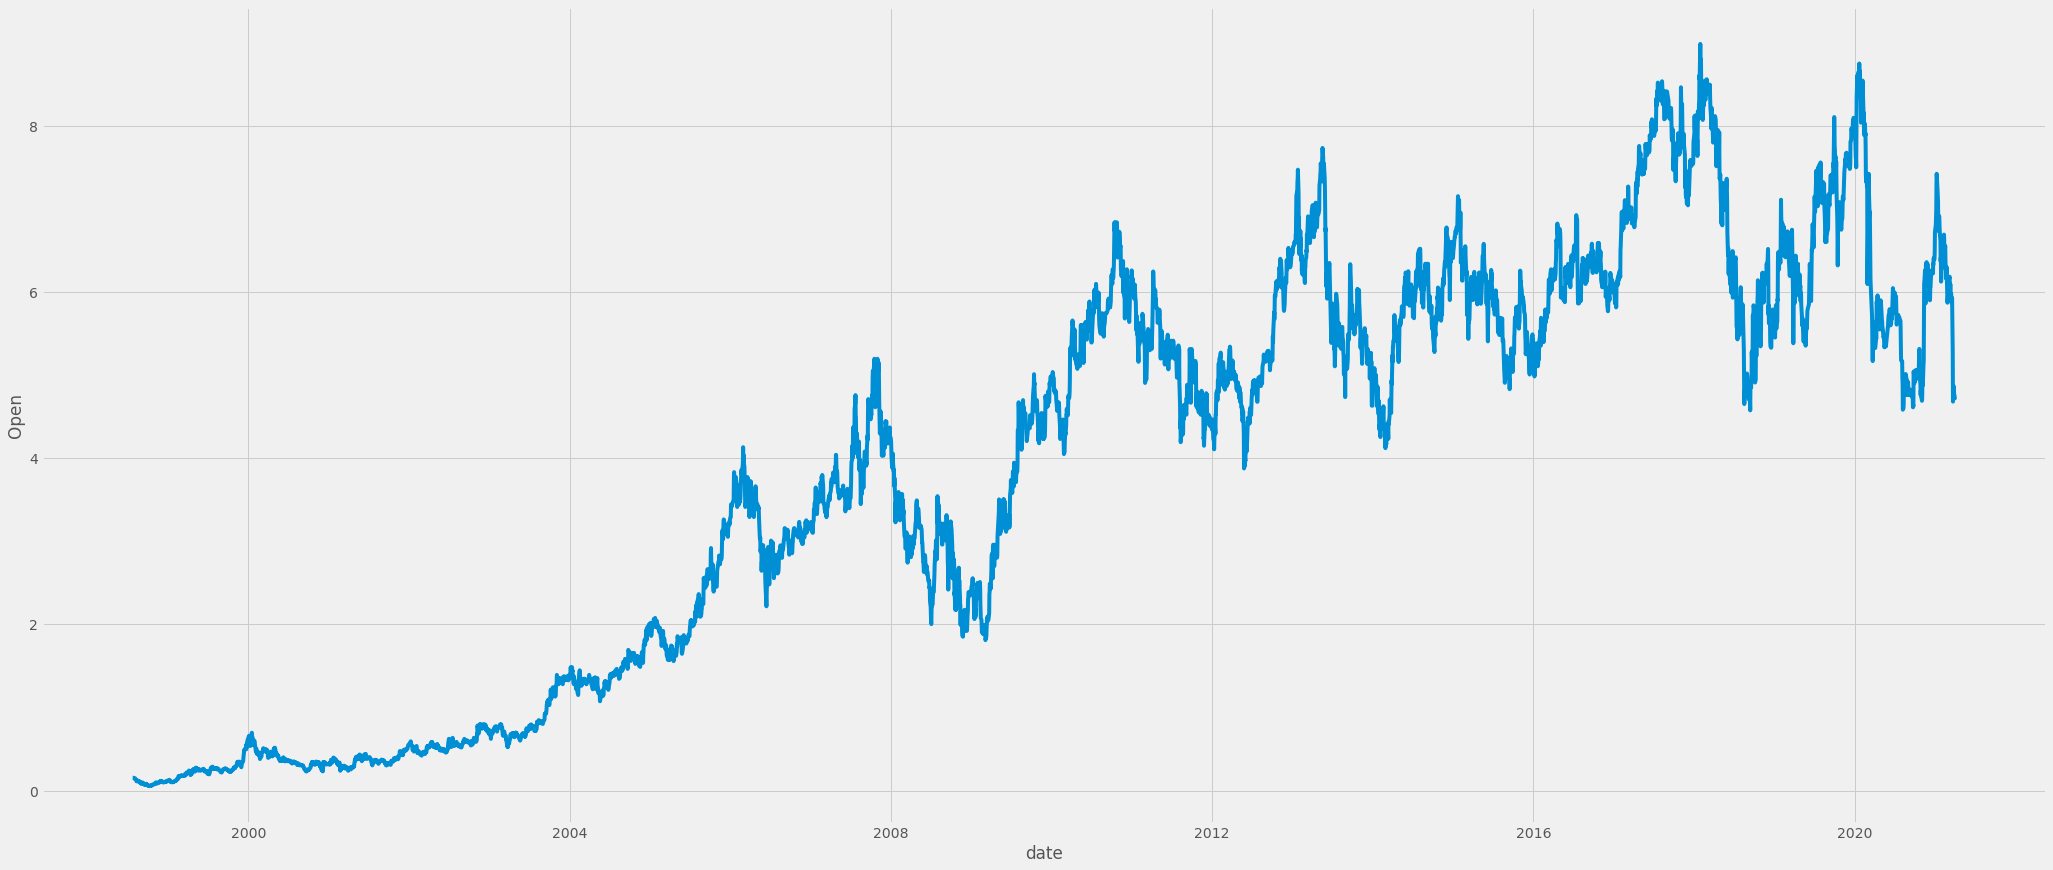

In [159]:
plt.figure(figsize=(32,14))
sns.lineplot(x="date", y="Open", ci=None,  data=hisseler)
plt.show()


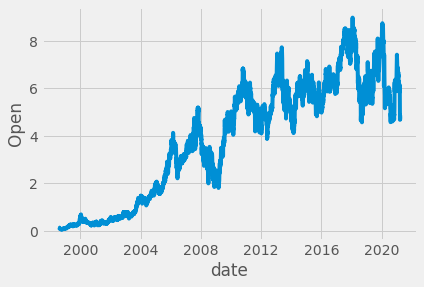

In [160]:
ax = sns.lineplot(x = "date", y = "Open", data = hisseler,);

In [161]:
type(hisseler['Open'].values)

numpy.ndarray

In [162]:
hisseler
dataset_total = pd.concat((hisseler['Open'], dataset_test['Open']), axis = 0)
inputs = hisseler[len(dataset_total) - len(hisseler[test_mask]['Open']) - 60:].values

NameError: name 'dataset_test' is not defined

In [215]:
test_data_start = '2017-01-01'

# allocate train - test

In [272]:
training_data_start = '2017-01-01'
test_mask = hisseler['date'] > test_data_start
training_mask = hisseler['date'] < test_data_start

In [279]:
# Checking for missing values
training_set = hisseler[training_mask][['date','Open']]
test_set = hisseler[test_mask][['date','Open']]

In [280]:
training_set = training_set.iloc[:, 1:2].values

In [282]:
type(training_set)

numpy.ndarray

In [283]:
print(training_set.shape)
print(type(training_set))


(4610, 1)
<class 'numpy.ndarray'>


In [284]:
len(training_set)

4610

# Feature Scaling

In [285]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output

In [266]:
X_train = []
y_train = []
for i in range(60, 4610):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [223]:
type(X_train)

numpy.ndarray

In [224]:
 X_train.shape

(4550, 60)

# Reshaping

In [463]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [464]:
type(X_train)

numpy.ndarray

In [465]:
X_train.shape

(46, 30, 1)

# Part 2 - Building and Training the LSTM

Importing the Keras libraries and packages

In [7]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense
from  tensorflow.keras.layers import LSTM
from  tensorflow.keras.layers import Dropout
from  tensorflow.keras.layers import RNN

GPU device NOT found


# Initialising the RNN

In [8]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

In [468]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

# Adding a second LSTM layer and some Dropout regularisation

In [469]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation

In [470]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a fourth LSTM layer and some Dropout regularisation

In [471]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

# Adding the output layer

In [472]:
regressor.add(Dense(units = 1))
#return vsur output layer.

# Compiling the RNN

In [473]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set

In [477]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
46/46 [==============================] - 6s 128ms/sample - loss: 0.2254 - acc: 0.0000e+00
Epoch 2/10
46/46 [==============================] - 0s 6ms/sample - loss: 0.1792 - acc: 0.0000e+00
Epoch 3/10
46/46 [==============================] - 0s 6ms/sample - loss: 0.1328 - acc: 0.0000e+00
Epoch 4/10
46/46 [==============================] - 0s 5ms/sample - loss: 0.0953 - acc: 0.0000e+00
Epoch 5/10
46/46 [==============================] - 0s 5ms/sample - loss: 0.1192 - acc: 0.0000e+00
Epoch 6/10
46/46 [==============================] - 0s 5ms/sample - loss: 0.0981 - acc: 0.0000e+00
Epoch 7/10
46/46 [==============================] - 0s 7ms/sample - loss: 0.0849 - acc: 0.0000e+00
Epoch 8/10
46/46 [==============================] - 0s 5ms/sample - loss: 0.0991 - acc: 0.0000e+00
Epoch 9/10
46/46 [==============================] - 0s 4ms/sample - loss: 0.0951 - acc: 0.0000e+00
Epoch 10/10
46/46 [==============================] - 0s 4ms/sample - loss: 0.0887 - acc: 0.0000e+00


# Part 3 - Making the predictions and visualising the results

# Getting the predicted stock price of 2017

In [240]:
training_set = hisseler[training_mask][['date','Open']]
test_set = hisseler[test_mask][['date','Open']]

In [241]:
type(test_set.iloc[:, 1:2].values)

numpy.ndarray

In [242]:
real_stock_price = test_set.iloc[:, 1:2].values

In [243]:
len(real_stock_price)

1069

In [244]:
dataset_total = pd.concat((hisseler[training_mask]['Open'], hisseler[test_mask]['Open']), axis = 0)

In [245]:
type(dataset_total)

pandas.core.series.Series

In [246]:
print("type dataset_total: ", type(dataset_total))
print("inputs: ", type(inputs))

type dataset_total:  <class 'pandas.core.series.Series'>
inputs:  <class 'numpy.ndarray'>


In [247]:
inputs = dataset_total[len(dataset_total) - len(hisseler[test_mask]['Open']) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1129):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [248]:
inputs = dataset_total[len(dataset_total) - len(hisseler[test_mask]['Open']) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [249]:
for i in range(60, 1129):
    X_test.append(inputs[i-60:i, 0])


In [504]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.size)
print( X_test.shape[1])
print(X_test.shape[0])


3660
60
61


In [505]:
len(dataset_total) - len(hisseler[test_mask]['Open']) - 60

-992

In [506]:
len(inputs)

121

In [507]:
len(inputs)

121

# Visualising the results

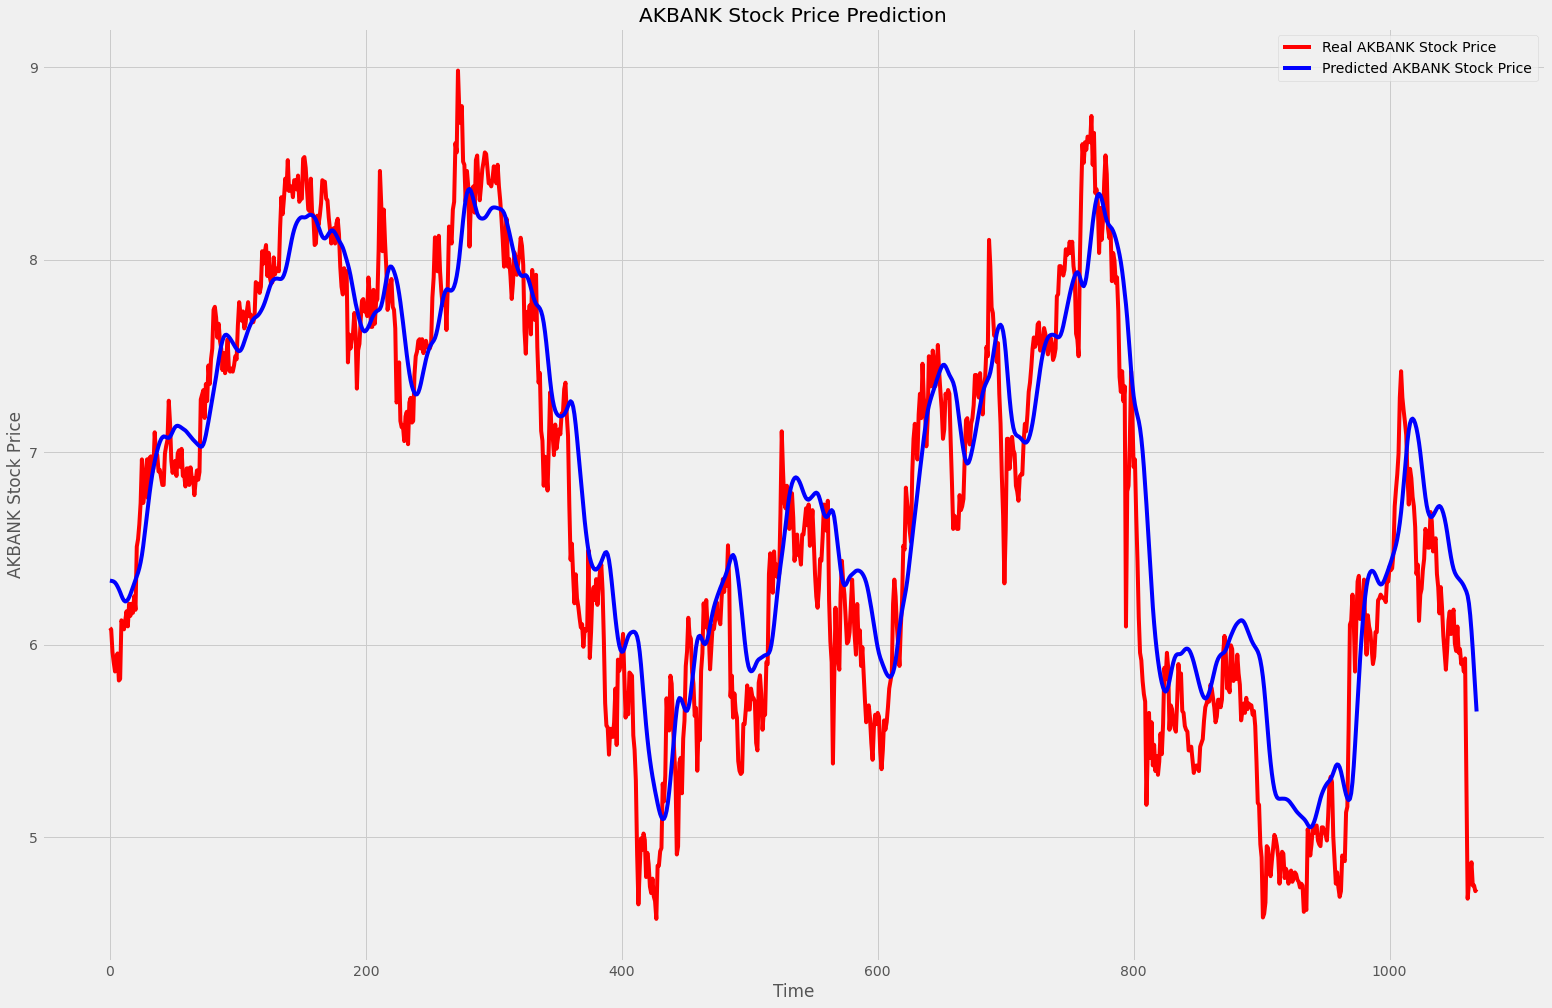

In [257]:
plt.figure(figsize=(24,16))
plt.plot(real_stock_price, color = 'red', label = 'Real AKBANK Stock Price',)
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AKBANK Stock Price')
plt.title('AKBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AKBANK Stock Price')
plt.legend()
plt.show()

In [469]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [359]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [394]:
type(only_hisse["last_value"].loc[int(_Row)-come_back:int(_Row)])

pandas.core.series.Series

In [508]:
only_last_value_train = only_hisse.loc[int(Reverse_Row)-come_back:int(Reverse_Row)].iloc[:,2:3]
only_last_value_train.shape

(76, 1)

In [509]:
training_set   =  only_hisse.loc[int(Reverse_Row)-come_back:int(Reverse_Row)].iloc[:,2:3].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [510]:
type(stock_code)

str

In [511]:
stock_code = stock_code[0:5]
stock_code

'ADEL'

In [512]:
str(hisse.tail(1)['date'])[6:16]

'2015-01-06'

In [513]:
len(only_hisse)

5671

# 2. Makale Çalışmaları GRU  

In [11]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.size)
print( X_test.shape[1])
print(X_test.shape[0])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape[1])

NameError: name 'X_test' is not defined

In [570]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# 2- Creating a data structure with test_treshold timesteps and 1 output

X_train = []
y_train = []
for i in range(test_treshold, len(training_set)):
    X_train.append(training_set_scaled[i-test_treshold:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [573]:
y_train.shape

(16,)

In [572]:
X_train.shape

(16, 60)

In [566]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [569]:
X_test.shape

(61, 60, 1)

# The GRU architecture

In [10]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.3))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.3))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.3))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='relu'))
regressorGRU.add(Dropout(0.3))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])



NameError: name 'X_train' is not defined

In [595]:
X_train.shape[1]

60

In [596]:
regressorGRU.input_shape

(None, 60, 1)

In [475]:
stock_code + ' Stock Price'

'YYAPI Stock Price'

# save stock name list earn class


In [402]:
import os
# Change directory
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\150');

data_set_list = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/Full/data_set_deneme.txt","a")

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()

# List all files and directories in current directory
os.listdir('.')
dosyalar = os.listdir()
for dosya in dosyalar:
    data_set_list.write(dosya + "\n")

data_set_list.close()

print("işlem tamam")

işlem tamam


In [40]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

# Tez Makale  1 -- regressorGRU Earn Class

In [630]:
import os

stock_code_adi=''
post_fix =".xlsx"
come_back = 75
test_treshold = 60
Reverse_Row = 0
return_value = 1.1
previous_stock_code = 'BASLANGIC'
excel_reverse_label = []
class_name = 0
Reverse_Row = 0
excel_reverse_label_count = 0
excel_index = 0
reverse_row_index = 1
label_index = 2
control = True
test_label_list = []
predict_label_list = []
earn_evaluate_label_list = []
sayac = 0


data_set_list = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/Full/data_set_deneme_earn.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.


for stock_code in data_set_list: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(" sayac: ", sayac)
    inner_list = []
    #print(stock_code,end = "") # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    #hisse_adi =stock_code.strip()+ post_fix
    hisse_adi =stock_code.strip()
    #print("hisse_adi:", hisse_adi)
    
    # illustrate excel files
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\150')

    xl = pd.ExcelFile(hisse_adi)
    
    # Print the sheet names
    # Load a sheet into a DataFrame by name: df1
    hisse = xl.parse(hisse_adi)
    hisse["excel_name"] = stock_code
    
    stock_code = stock_code[0:5]
    
       
    if has_numbers(stock_code):
        stock_code = stock_code[0:4]
        
    hisse.set_index('Reverse_Row')
    hisse["stock_code"] = stock_code
    
    #print("stock_code", stock_code)
    #print("\n")
        
    if hisse_adi.find("Tuzak")>-1:
        class_name = 2
    elif hisse_adi.find("Kazanc")>-1:
        class_name = 1
        
    #hisse["class_name"] = class_name
    Reverse_Row = hisse.tail(1)["Reverse_Row"]
    inner_list.append(hisse_adi)
    inner_list.append(int(Reverse_Row))
    inner_list.append(class_name)
    excel_reverse_label.append(inner_list)
    sayac = sayac + 1 

for i in excel_reverse_label:
    excel_reverse_label_count = excel_reverse_label_count + 1

    
##################### get unique stock values (Load)
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\hisse_datalar_xls_yeni')

 
for excel_i in range(0,excel_reverse_label_count):
    
    inner_evaluate_list = []

    temp_stock = excel_reverse_label[excel_i][excel_index]    
    temp_label = excel_reverse_label[excel_i][label_index]    
     
    temp_stock = temp_stock[0:5]
    
    if has_numbers(temp_stock):
        temp_stock = temp_stock[0:4]
        
    temp_reverse_row = excel_reverse_label[excel_i][reverse_row_index]    
    
    hisse_adi = temp_stock.strip()+ post_fix
    
    
    if previous_stock_code.strip() != temp_stock:
        print("previous_stock_code : " , previous_stock_code)
        print("hisse_adi : " , hisse_adi)
        print("temp_stock : " , temp_stock)
        print("Başka bir hisseye geçtim ")
        xl = pd.ExcelFile(hisse_adi)
        only_hisse = xl.parse(temp_stock)
        previous_stock_code = temp_stock
        print("\n")
        
    
    
    only_hisse = xl.parse(temp_stock)
    only_hisse.set_index('Reverse_Row')
        
        
    # Load a sheet into a DataFrame by name: df1
    

    if only_hisse.index.argmax() > temp_reverse_row:
        
        if int(temp_reverse_row) > come_back:

            only_last_value_train = only_hisse.loc[int(temp_reverse_row)-come_back:int(temp_reverse_row)].iloc[:,5:6]
            only_last_value_test = only_hisse.loc[int(temp_reverse_row):int(temp_reverse_row)+test_treshold].iloc[:,5:6]
        else:
            only_last_value_train =  only_hisse.loc[:int(temp_reverse_row)].iloc[:,5:6]
            only_last_value_test  = only_hisse.loc[int(temp_reverse_row):int(temp_reverse_row)+test_treshold].iloc[:,5:6]


        training_set   =  only_last_value_train.values
        test_set    = only_last_value_test.values

        # calculating return value with last value and predicted values 
        last_value_of_training_set = float(only_last_value_train.get_values()[len(only_last_value_train.get_values())-1])


        print("döngüdeki hisse: ",temp_stock )

          #**************************    LSTM PHASE    **************************************    

        # 1- Feature Scaling

        sc = MinMaxScaler(feature_range = (0, 1))
        training_set_scaled = sc.fit_transform(training_set)

        # 2- Creating a data structure with test_treshold timesteps and 1 output

        X_train = []
        y_train = []
        for i in range(test_treshold, len(training_set)):
            X_train.append(training_set_scaled[i-test_treshold:i, 0])
            y_train.append(training_set_scaled[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)

        # 3- Reshaping

        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        # 4- Fitting the RNN to the Training set


        # Fitting to the training set
        regressorGRU.fit(X_train,y_train,epochs=10,batch_size=150)

        real_stock_price = test_set

        # 5- Getting the predicted test values

        dataset_total = pd.concat((only_last_value_train , only_last_value_test ), axis = 0)
        inputs = dataset_total[len(dataset_total) - len(test_set) - test_treshold:].values
        inputs = inputs.reshape(-1,1)
        inputs = sc.transform(inputs)
        X_test = []
        for i in range(test_treshold, len(inputs)):
            X_test.append(inputs[i-test_treshold:i,0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        predicted_stock_price = regressorGRU.predict(X_test)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # 6- Evaluate predicted values and generate predict class

        max_predicted_value = predicted_stock_price.max()

        '''
        print(" max_predicted_value : ", max_predicted_value)
        print(" last_value_of_training_set : ", last_value_of_training_set)
        print("return_value: ", return_value)
        '''


        if float(max_predicted_value/last_value_of_training_set) > return_value :
               predicted_label = 1
        else :
               predicted_label = 2

        predict_label_list.append(predicted_label)

        print("excel_i : ", excel_i)

        inner_evaluate_list.append(excel_reverse_label[excel_i][excel_index])
        inner_evaluate_list.append(excel_reverse_label[excel_i][label_index])
        inner_evaluate_list.append(predicted_label)

        earn_evaluate_label_list.append(inner_evaluate_list)

        '''
        # Visualising the results
        plt.figure(figsize=(16,10))
        plt.plot(real_stock_price, color = 'red', label = stock_code + ' Stock Price')
        plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ' + stock_code + ' Stock Price')
        plt.title(stock_code + ' Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel(stock_code + ' Stock Price')
        plt.legend()
        plt.show()
        '''
    
data_set_list.close()    
print("\n")    
print("işlem tamam")


 sayac:  0
 sayac:  1
 sayac:  2
 sayac:  3
 sayac:  4
 sayac:  5
 sayac:  6
 sayac:  7
 sayac:  8
 sayac:  9
 sayac:  10
 sayac:  11
 sayac:  12
 sayac:  13
 sayac:  14
 sayac:  15
 sayac:  16
 sayac:  17
 sayac:  18
 sayac:  19
 sayac:  20
 sayac:  21
 sayac:  22
 sayac:  23
 sayac:  24
 sayac:  25
 sayac:  26
 sayac:  27
 sayac:  28
 sayac:  29
 sayac:  30
 sayac:  31
 sayac:  32
 sayac:  33
 sayac:  34
 sayac:  35
 sayac:  36
 sayac:  37
 sayac:  38
 sayac:  39
 sayac:  40
 sayac:  41
 sayac:  42
 sayac:  43
 sayac:  44
 sayac:  45
 sayac:  46
 sayac:  47
 sayac:  48
 sayac:  49
 sayac:  50
 sayac:  51
 sayac:  52
 sayac:  53
 sayac:  54
 sayac:  55
 sayac:  56
 sayac:  57
 sayac:  58
 sayac:  59
 sayac:  60
 sayac:  61
 sayac:  62
 sayac:  63
 sayac:  64
 sayac:  65
 sayac:  66
 sayac:  67
 sayac:  68
 sayac:  69
 sayac:  70
 sayac:  71
 sayac:  72
 sayac:  73
 sayac:  74
 sayac:  75
 sayac:  76
 sayac:  77
 sayac:  78
 sayac:  79
 sayac:  80
 sayac:  81
 sayac:  82
 sayac:  83
 s

 sayac:  640
 sayac:  641
 sayac:  642
 sayac:  643
 sayac:  644
 sayac:  645
 sayac:  646
 sayac:  647
 sayac:  648
 sayac:  649
 sayac:  650
 sayac:  651
 sayac:  652
 sayac:  653
 sayac:  654
 sayac:  655
 sayac:  656
 sayac:  657
 sayac:  658
 sayac:  659
 sayac:  660
 sayac:  661
 sayac:  662
 sayac:  663
 sayac:  664
 sayac:  665
 sayac:  666
 sayac:  667
 sayac:  668
 sayac:  669
 sayac:  670
 sayac:  671
 sayac:  672
 sayac:  673
 sayac:  674
 sayac:  675
 sayac:  676
 sayac:  677
 sayac:  678
 sayac:  679
 sayac:  680
 sayac:  681
 sayac:  682
 sayac:  683
 sayac:  684
 sayac:  685
 sayac:  686
 sayac:  687
 sayac:  688
 sayac:  689
 sayac:  690
 sayac:  691
 sayac:  692
 sayac:  693
 sayac:  694
 sayac:  695
 sayac:  696
 sayac:  697
 sayac:  698
 sayac:  699
 sayac:  700
 sayac:  701
 sayac:  702
 sayac:  703
 sayac:  704
 sayac:  705
 sayac:  706
 sayac:  707
 sayac:  708
 sayac:  709
 sayac:  710
 sayac:  711
 sayac:  712
 sayac:  713
 sayac:  714
 sayac:  715
 sayac:  716

 sayac:  1252
 sayac:  1253
 sayac:  1254
 sayac:  1255
 sayac:  1256
 sayac:  1257
 sayac:  1258
 sayac:  1259
 sayac:  1260
 sayac:  1261
 sayac:  1262
 sayac:  1263
 sayac:  1264
 sayac:  1265
 sayac:  1266
 sayac:  1267
 sayac:  1268
 sayac:  1269
 sayac:  1270
 sayac:  1271
 sayac:  1272
 sayac:  1273
 sayac:  1274
 sayac:  1275
 sayac:  1276
 sayac:  1277
 sayac:  1278
 sayac:  1279
 sayac:  1280
 sayac:  1281
 sayac:  1282
 sayac:  1283
 sayac:  1284
 sayac:  1285
 sayac:  1286
 sayac:  1287
 sayac:  1288
 sayac:  1289
 sayac:  1290
 sayac:  1291
 sayac:  1292
 sayac:  1293
 sayac:  1294
 sayac:  1295
 sayac:  1296
 sayac:  1297
 sayac:  1298
 sayac:  1299
 sayac:  1300
 sayac:  1301
 sayac:  1302
 sayac:  1303
 sayac:  1304
 sayac:  1305
 sayac:  1306
 sayac:  1307
 sayac:  1308
 sayac:  1309
 sayac:  1310
 sayac:  1311
 sayac:  1312
 sayac:  1313
 sayac:  1314
 sayac:  1315
 sayac:  1316
 sayac:  1317
 sayac:  1318
 sayac:  1319
 sayac:  1320
 sayac:  1321
 sayac:  1322
 sayac

 sayac:  1840
 sayac:  1841
 sayac:  1842
 sayac:  1843
 sayac:  1844
 sayac:  1845
 sayac:  1846
 sayac:  1847
 sayac:  1848
 sayac:  1849
 sayac:  1850
 sayac:  1851
 sayac:  1852
 sayac:  1853
 sayac:  1854
 sayac:  1855
 sayac:  1856
 sayac:  1857
 sayac:  1858
 sayac:  1859
 sayac:  1860
 sayac:  1861
 sayac:  1862
 sayac:  1863
 sayac:  1864
 sayac:  1865
 sayac:  1866
 sayac:  1867
 sayac:  1868
 sayac:  1869
 sayac:  1870
 sayac:  1871
 sayac:  1872
 sayac:  1873
 sayac:  1874
 sayac:  1875
 sayac:  1876
 sayac:  1877
 sayac:  1878
 sayac:  1879
 sayac:  1880
 sayac:  1881
 sayac:  1882
 sayac:  1883
 sayac:  1884
 sayac:  1885
 sayac:  1886
 sayac:  1887
 sayac:  1888
 sayac:  1889
 sayac:  1890
 sayac:  1891
 sayac:  1892
 sayac:  1893
 sayac:  1894
 sayac:  1895
 sayac:  1896
 sayac:  1897
 sayac:  1898
 sayac:  1899
 sayac:  1900
 sayac:  1901
 sayac:  1902
 sayac:  1903
 sayac:  1904
 sayac:  1905
 sayac:  1906
 sayac:  1907
 sayac:  1908
 sayac:  1909
 sayac:  1910
 sayac

 sayac:  2426
 sayac:  2427
 sayac:  2428
 sayac:  2429
 sayac:  2430
 sayac:  2431
 sayac:  2432
 sayac:  2433
 sayac:  2434
 sayac:  2435
 sayac:  2436
 sayac:  2437
 sayac:  2438
 sayac:  2439
 sayac:  2440
 sayac:  2441
 sayac:  2442
 sayac:  2443
 sayac:  2444
 sayac:  2445
 sayac:  2446
 sayac:  2447
 sayac:  2448
 sayac:  2449
 sayac:  2450
 sayac:  2451
 sayac:  2452
 sayac:  2453
 sayac:  2454
 sayac:  2455
 sayac:  2456
 sayac:  2457
 sayac:  2458
 sayac:  2459
 sayac:  2460
 sayac:  2461
 sayac:  2462
 sayac:  2463
 sayac:  2464
 sayac:  2465
 sayac:  2466
 sayac:  2467
 sayac:  2468
 sayac:  2469
 sayac:  2470
 sayac:  2471
 sayac:  2472
 sayac:  2473
 sayac:  2474
 sayac:  2475
 sayac:  2476
 sayac:  2477
 sayac:  2478
 sayac:  2479
 sayac:  2480
 sayac:  2481
 sayac:  2482
 sayac:  2483
 sayac:  2484
 sayac:  2485
 sayac:  2486
 sayac:  2487
 sayac:  2488
 sayac:  2489
 sayac:  2490
 sayac:  2491
 sayac:  2492
 sayac:  2493
 sayac:  2494
 sayac:  2495
 sayac:  2496
 sayac

 sayac:  3013
 sayac:  3014
 sayac:  3015
 sayac:  3016
 sayac:  3017
 sayac:  3018
 sayac:  3019
 sayac:  3020
 sayac:  3021
 sayac:  3022
 sayac:  3023
 sayac:  3024
 sayac:  3025
 sayac:  3026
 sayac:  3027
 sayac:  3028
 sayac:  3029
 sayac:  3030
 sayac:  3031
 sayac:  3032
 sayac:  3033
 sayac:  3034
 sayac:  3035
 sayac:  3036
 sayac:  3037
 sayac:  3038
 sayac:  3039
 sayac:  3040
 sayac:  3041
 sayac:  3042
 sayac:  3043
 sayac:  3044
 sayac:  3045
 sayac:  3046
 sayac:  3047
 sayac:  3048
 sayac:  3049
 sayac:  3050
 sayac:  3051
 sayac:  3052
 sayac:  3053
 sayac:  3054
 sayac:  3055
 sayac:  3056
 sayac:  3057
 sayac:  3058
 sayac:  3059
 sayac:  3060
 sayac:  3061
 sayac:  3062
 sayac:  3063
 sayac:  3064
 sayac:  3065
 sayac:  3066
 sayac:  3067
 sayac:  3068
 sayac:  3069
 sayac:  3070
 sayac:  3071
 sayac:  3072
 sayac:  3073
 sayac:  3074
 sayac:  3075
 sayac:  3076
 sayac:  3077
 sayac:  3078
 sayac:  3079
 sayac:  3080
 sayac:  3081
 sayac:  3082
 sayac:  3083
 sayac

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6931 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5994 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5668 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6084 - acc: 0.0625
excel_i :  4
döngüdeki hisse:  ADEL
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 1.0128 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 1.0073 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.9309 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8808 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8916 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8613 -

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6846 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7495 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7094 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7156 - acc: 0.0000e+00
excel_i :  12
döngüdeki hisse:  ADEL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7706 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7645 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7431 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7535 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7562 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample

16/16 [==============================] - 0s 16ms/sample - loss: 0.6947 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6418 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5879 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5529 - acc: 0.0625
excel_i :  20
previous_stock_code :  ADEL
hisse_adi :  AKBNK.xlsx
temp_stock :  AKBNK
Başka bir hisseye geçtim 


döngüdeki hisse:  AKBNK
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5950 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7802 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6015 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.7799 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 1.0245 - 

Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7250 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7137 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7006 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6691 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6458 - acc: 0.0625
excel_i :  28
döngüdeki hisse:  AKBNK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7060 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6466 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5986 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5647 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5719 - acc:

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6363 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6169 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6172 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6362 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5949 - acc: 0.0625
excel_i :  36
döngüdeki hisse:  AKBNK
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.4698 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.4910 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.4793 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4720 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4637 - acc: 0.0625
Epoch 

16/16 [==============================] - 0s 9ms/sample - loss: 0.6876 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6860 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6862 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6826 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6613 - acc: 0.0000e+00
excel_i :  44
döngüdeki hisse:  AKBNK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6486 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6205 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6915 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7072 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7246 - acc: 0.12

Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6483 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6621 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6422 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6588 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6427 - acc: 0.0000e+00
excel_i :  52
döngüdeki hisse:  AKCNS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5943 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5868 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5834 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5877 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sam

Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7842 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7415 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.7376 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7729 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7978 - acc: 0.0000e+00
excel_i :  60
döngüdeki hisse:  AKCNS
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.7918 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7732 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7705 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7579 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/s

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5296 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5222 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5198 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5164 - acc: 0.0625
excel_i :  68
döngüdeki hisse:  AKCNS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6594 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6652 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6734 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6559 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6680 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.673

Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6407 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6485 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6898 - acc: 0.0625
excel_i :  76
döngüdeki hisse:  AKCNS
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7032 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6585 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6481 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6712 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7913 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6191 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss:

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6727 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7140 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7410 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6541 - acc: 0.0625
excel_i :  84
döngüdeki hisse:  AKGRT
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6610 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6466 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6664 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6274 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6704 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5835 - acc: 0.0

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6379 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5767 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5506 - acc: 0.0625
excel_i :  92
döngüdeki hisse:  AKGRT
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5518 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5658 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5470 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5630 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5251 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5198 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5286 - acc: 0.0625
Epo

Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4475 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4566 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4397 - acc: 0.0625
excel_i :  100
döngüdeki hisse:  AKSGY
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7632 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7948 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7639 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7967 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7297 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7744 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.73

Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6203 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6250 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6407 - acc: 0.0000e+00
excel_i :  108
döngüdeki hisse:  AKSGY
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5419 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6537 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5034 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.8764 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5596 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5237 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/samp

Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6362 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5982 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5841 - acc: 0.0625
excel_i :  116
döngüdeki hisse:  AKSGY
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6958 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6979 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7639 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7040 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6593 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7384 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6882 - 

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7042 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.7078 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7018 - acc: 0.0625
excel_i :  124
döngüdeki hisse:  AKSGY
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6992 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6816 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6838 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6913 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6558 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6532 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6756 - acc: 0.062

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5760 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5497 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5642 - acc: 0.0625
excel_i :  132
döngüdeki hisse:  ALARK
Epoch 1/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6490 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6616 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5851 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6363 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6303 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6443 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6701 - acc: 0.1250
Ep

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6841 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6870 - acc: 0.0000e+00
excel_i :  140
döngüdeki hisse:  ALARK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5569 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5779 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5492 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5388 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5465 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5639 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5205 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/samp

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6626 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6871 - acc: 0.0625
excel_i :  148
döngüdeki hisse:  ALARK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7346 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7184 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7288 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7595 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7159 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7621 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7126 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - los

Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5270 - acc: 0.1875
excel_i :  156
döngüdeki hisse:  ALARK
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7083 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6899 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6728 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7481 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6544 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7179 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6825 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7207 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 15ms/samp

Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6588 - acc: 0.1250
excel_i :  164
döngüdeki hisse:  ALCAR
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6548 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.8506 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6704 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8815 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6265 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6617 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6349 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.9792 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6100 - acc: 0.0

excel_i :  172
döngüdeki hisse:  ALCAR
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6448 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6571 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6633 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6569 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6812 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6640 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6705 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6389 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6513 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample

döngüdeki hisse:  ALCAR
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6396 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6856 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6638 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6509 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6496 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6418 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6387 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6573 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8468 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6470 - acc: 0.0625
excel_i :  181


16/16 [==============================] - 0s 17ms/sample - loss: 0.5757 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5578 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5671 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5573 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5642 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5526 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5652 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5674 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5527 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5708 - acc: 0.0000e+00
excel_i : 

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5738 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5600 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5481 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5546 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5503 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5643 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5552 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5520 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5510 - acc: 0.0000e+00
excel_i :  197
döngüdeki hisse:  ALCTL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sam

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4470 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4253 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4359 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4248 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4199 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4284 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4316 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4261 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4347 - acc: 0.0625
excel_i :  205
döngüdeki hisse:  ALCTL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6516 - acc: 0.0625
Ep

Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6374 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6192 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6318 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6472 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6337 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6151 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6182 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6261 - acc: 0.0625
excel_i :  213
döngüdeki hisse:  ALCTL
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7847 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 1.2295 - acc: 0.0625


Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8099 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7609 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7819 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7605 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7556 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7568 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7794 - acc: 0.0000e+00
excel_i :  221
previous_stock_code :  ALCTL
hisse_adi :  ARCLK.xlsx
temp_stock :  ARCLK
Başka bir hisseye geçtim 


döngüdeki hisse:  ARCLK
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.8140 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 14ms

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6580 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6519 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5998 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6516 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6359 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6095 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5902 - acc: 0.0000e+00
excel_i :  229
döngüdeki hisse:  ARCLK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6212 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6576 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/samp

Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5672 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5711 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5648 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5569 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5616 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5485 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5539 - acc: 0.0625
excel_i :  237
döngüdeki hisse:  ARCLK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6780 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6718 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6759 - acc: 0.0000

Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5814 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5895 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6037 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5958 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5819 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6025 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6009 - acc: 0.1250
excel_i :  245
döngüdeki hisse:  ARSAN
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4725 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4880 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4701 - acc:

Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5132 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5298 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5044 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5247 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5166 - acc: 0.0000e+00
excel_i :  253
döngüdeki hisse:  ARSAN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6069 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6165 - acc: 0.2500
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5643 - acc: 0.2500
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5647 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5049 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4866 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4594 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4830 - acc: 0.1250
excel_i :  261
döngüdeki hisse:  ARSAN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6405 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6561 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6356 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6210 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6397 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6617

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5741 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5505 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5427 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5604 - acc: 0.1250
excel_i :  269
döngüdeki hisse:  ASELS
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.8558 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5987 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5345 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6061 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5073 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7744 - acc: 0.0625
Epoch 

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5093 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5372 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5294 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5071 - acc: 0.0000e+00
excel_i :  277
döngüdeki hisse:  ASELS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 1.1003 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5883 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5919 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6450 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6172 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5975 - ac

Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6879 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7272 - acc: 0.0000e+00
excel_i :  285
döngüdeki hisse:  ASELS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4319 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4326 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4256 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4301 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4363 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4274 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4353 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/samp

Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6437 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6608 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6548 - acc: 0.0000e+00
excel_i :  293
döngüdeki hisse:  ASUZU
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6491 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6519 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6466 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6533 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6340 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6457 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5960 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6316 - acc: 0.0000e+00
excel_i :  301
döngüdeki hisse:  ASUZU
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6583 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6866 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7039 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7309 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6819 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7293 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7305 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6950 - ac

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5997 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5866 - acc: 0.1250
excel_i :  309
döngüdeki hisse:  ASUZU
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3776 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4065 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3981 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3789 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3594 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3722 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3881 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3850 - acc: 0.0625
Epoch

Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7814 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6101 - acc: 0.0000e+00
excel_i :  317
döngüdeki hisse:  ASUZU
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7032 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5361 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5637 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8003 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7564 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5743 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5965 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5680 - a

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6379 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6245 - acc: 0.0000e+00
excel_i :  325
döngüdeki hisse:  ATAGY
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6574 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7000 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6898 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6786 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7069 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7110 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7390 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7817 - ac

excel_i :  340
döngüdeki hisse:  ATAGY
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2251 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2269 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2138 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2135 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2266 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2194 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2087 - acc: 0.1875
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2031 - acc: 0.1875
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2341 - acc: 0.1875
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.1964 - acc: 0.1875
e

excel_i :  349
döngüdeki hisse:  ATEKS
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7049 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6920 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7237 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6889 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6504 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6783 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6488 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6671 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6481 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6519 - acc: 0.062

döngüdeki hisse:  ATEKS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5832 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5720 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5505 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5387 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5514 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5183 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5397 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5327 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5638 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5317 - acc: 0.1250
excel_i :  358
dö

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5325 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5053 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6489 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4820 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4919 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5463 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6213 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7226 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4991 - acc: 0.0000e+00
excel_i :  366
döngüdeki hisse:  ATEKS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sam

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5887 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6576 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5930 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6011 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5954 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6225 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6308 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6007 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5768 - acc: 0.0000e+00
excel_i :  374
döngüdeki hisse:  ATLAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sam

Epoch 2/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6497 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6497 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6471 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6457 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6555 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6356 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6455 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6413 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6397 - acc: 0.0000e+00
excel_i :  382
döngüdeki hisse:  ATLAS
Epoch 1/10
16/16 [==============================] - 0s 21ms/

Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5775 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5739 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5729 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6343 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7702 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6149 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5736 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5535 - acc: 0.0625
excel_i :  390
döngüdeki hisse:  ATLAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7168 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6964 - acc: 

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6134 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6014 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6277 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5907 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6346 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5995 - acc: 0.1875
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5856 - acc: 0.1875
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6012 - acc: 0.1875
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6216 - acc: 0.1875
excel_i :  399
döngüdeki hisse:  AVGYO
Epoch 1/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.6478 - acc: 0.0625
Epoc

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7098 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7094 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7035 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7033 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7096 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7245 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7208 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7071 - acc: 0.0000e+00
excel_i :  407
döngüdeki hisse:  AVGYO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6154 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - lo

Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3278 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3530 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3431 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3512 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3415 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3259 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3661 - acc: 0.0625
excel_i :  415
döngüdeki hisse:  AVGYO
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5834 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6000 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5885 - acc: 0.06

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7010 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6954 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6673 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6614 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6611 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6699 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6750 - acc: 0.0000e+00
excel_i :  424
döngüdeki hisse:  AYGAZ
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6569 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.8714 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sampl

Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4998 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4805 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5047 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4743 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4850 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4907 - acc: 0.1250
excel_i :  432
döngüdeki hisse:  AYGAZ
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6232 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6221 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6403 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6454 - acc: 0.

Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6362 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6168 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6206 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6691 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7341 - acc: 0.0625
excel_i :  440
döngüdeki hisse:  AYGAZ
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5385 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5506 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5409 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5448 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.547

Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5975 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5769 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5933 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5661 - acc: 0.0625
excel_i :  448
döngüdeki hisse:  AYGAZ
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7113 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7043 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6981 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6999 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6961 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.9724 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5900 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7197 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5862 - acc: 0.0625
excel_i :  456
döngüdeki hisse:  BAKAB
Epoch 1/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7838 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5978 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5969 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6489 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6239 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3530 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3423 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3422 - acc: 0.0625
excel_i :  464
döngüdeki hisse:  BAKAB
Epoch 1/10
16/16 [==============================] - 0s 26ms/sample - loss: 0.6322 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6265 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6187 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6263 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6341 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6476 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6007 - acc: 0.1250
Epo

16/16 [==============================] - 0s 12ms/sample - loss: 0.5676 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5731 - acc: 0.0000e+00
excel_i :  472
döngüdeki hisse:  BAKAB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6588 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6750 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6480 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6467 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6666 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6650 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6492 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss

Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5528 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5288 - acc: 0.0625
excel_i :  480
previous_stock_code :  BAKAB
hisse_adi :  BANVT.xlsx
temp_stock :  BANVT
Başka bir hisseye geçtim 


döngüdeki hisse:  BANVT
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3844 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3973 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3928 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3901 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3566 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3654 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - lo

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4960 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4650 - acc: 0.0625
excel_i :  488
döngüdeki hisse:  BANVT
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5505 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5846 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5268 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5233 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6357 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5100 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5098 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5367 - acc: 0.06

Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6160 - acc: 0.0000e+00
excel_i :  496
döngüdeki hisse:  BANVT
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6145 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6391 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6368 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7518 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5898 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6337 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6127 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6026 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6002 - acc: 0.125

döngüdeki hisse:  BANVT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5199 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5289 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5226 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5269 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5209 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5195 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5266 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5247 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5210 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5110 - acc: 0.0625
excel_i :  505


excel_i :  512
döngüdeki hisse:  BFREN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2350 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2368 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2259 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2307 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2166 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2281 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2304 - acc: 0.1875
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2186 - acc: 0.1875
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2192 - acc: 0.1875
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2266 - acc: 0.1875
exc

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6366 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6384 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6591 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6417 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6614 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6454 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6570 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6471 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6679 - acc: 0.0625
excel_i :  521
döngüdeki hisse:  BFREN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7045 - acc: 0

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2647 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2633 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2847 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.2739 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2769 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2728 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2695 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.2754 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.2777 - acc: 0.0625
excel_i :  529
döngüdeki hisse:  BFREN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6883 - acc: 0.0000e+

Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6653 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6841 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6430 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6711 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6350 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6473 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6435 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6484 - acc: 0.0000e+00
excel_i :  537
döngüdeki hisse:  BOSSA
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6514 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 14ms/

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7084 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6803 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6968 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6847 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6829 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7017 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6831 - acc: 0.0000e+00
excel_i :  545
döngüdeki hisse:  BOSSA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6390 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5737 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/

Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.8429 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 1.0101 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7249 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7160 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7359 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7086 - acc: 0.0000e+00
excel_i :  553
döngüdeki hisse:  BOSSA
Epoch 1/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6042 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6148 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6142 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - l

Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6731 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6822 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6669 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6703 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6909 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6823 - acc: 0.0000e+00
excel_i :  561
döngüdeki hisse:  BOSSA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6830 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6934 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7017 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sampl

Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6208 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6255 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6250 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6291 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6191 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6286 - acc: 0.0000e+00
excel_i :  569
döngüdeki hisse:  BRISA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5820 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.9660 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8642 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/

Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4772 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4862 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6115 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6623 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4763 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6387 - acc: 0.0000e+00
excel_i :  577
döngüdeki hisse:  BRISA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5623 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5479 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5280 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6386 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6244 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5295 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4994 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5579 - acc: 0.0625
excel_i :  585
döngüdeki hisse:  BRISA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5753 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5600 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5616 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5453 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5655 - acc: 0.0625
Epoc

Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6436 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6429 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6445 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6833 - acc: 0.0625
excel_i :  593
döngüdeki hisse:  BRMEN
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4475 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4501 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4424 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4378 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4402 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4411 - acc: 0.0625


16/16 [==============================] - 0s 13ms/sample - loss: 0.4420 - acc: 0.2500
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4464 - acc: 0.2500
excel_i :  601
döngüdeki hisse:  BRMEN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3641 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3572 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3548 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3662 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3452 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3524 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3555 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3646 - acc: 0.0625
Epoch 9/10
16/

excel_i :  609
döngüdeki hisse:  BRMEN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5443 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5450 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5329 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5355 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5474 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5392 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5393 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5201 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5455 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sa

excel_i :  617
döngüdeki hisse:  BRMEN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7166 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7314 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6930 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7251 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7152 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6975 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7375 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7002 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7074 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7170 -

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6224 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6092 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6430 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6623 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6429 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6104 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6670 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6873 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6486 - acc: 0.0625
excel_i :  627
döngüdeki hisse:  BRSAN
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5634 - acc: 0.0000e+00


Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5897 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5688 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5396 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5442 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5601 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5488 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5565 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5267 - acc: 0.0000e+00
excel_i :  635
döngüdeki hisse:  BRSAN
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6658 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 20ms/

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4744 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4620 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4703 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4763 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4723 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4807 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4761 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4840 - acc: 0.0625
excel_i :  643
döngüdeki hisse:  BRSAN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4316 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4320 - acc: 0.0625
Epoch 

Epoch 3/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.7575 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.7686 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7581 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7655 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7760 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7317 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7545 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7404 - acc: 0.0000e+00
excel_i :  651
döngüdeki hisse:  BRYAT
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7319 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/

Epoch 3/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6385 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6187 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.9829 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6892 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6217 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5794 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6537 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6956 - acc: 0.0625
excel_i :  659
döngüdeki hisse:  BRYAT
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7409 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7406 - acc: 0.0

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5712 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5576 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5689 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5961 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5634 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5694 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5869 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5790 - acc: 0.0625
excel_i :  667
döngüdeki hisse:  BRYAT
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8632 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7842 - acc: 0.000

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5867 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5712 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5790 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5780 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5768 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5766 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5749 - acc: 0.0625
excel_i :  675
döngüdeki hisse:  BRYAT
Epoch 1/10
16/16 [==============================] - 0s 26ms/sample - loss: 0.5837 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5847 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5928 - acc: 0.0625


Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4782 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5090 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4634 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4646 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4711 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4665 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4646 - acc: 0.1250
excel_i :  683
döngüdeki hisse:  BTCIM
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7213 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7029 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7297 - acc: 0.

16/16 [==============================] - 0s 10ms/sample - loss: 0.5745 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5967 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5762 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5792 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5477 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6089 - acc: 0.0625
excel_i :  691
döngüdeki hisse:  BTCIM
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4964 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5217 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5098 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4947 - acc: 0.0625
Epoch 5/10
16

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6526 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6462 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6222 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6846 - acc: 0.0625
excel_i :  699
döngüdeki hisse:  BTCIM
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6144 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6496 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6504 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6458 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6382 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5981 - acc: 0.0625
E

Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6859 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6815 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6757 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6758 - acc: 0.0000e+00
excel_i :  707
döngüdeki hisse:  BUCIM
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6792 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6880 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6692 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6709 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6921 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/

Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5603 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5538 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5720 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5748 - acc: 0.1250
excel_i :  715
döngüdeki hisse:  BUCIM
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6781 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 26ms/sample - loss: 0.6810 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6873 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6940 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6983 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6019 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5771 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5809 - acc: 0.0000e+00
excel_i :  723
döngüdeki hisse:  BUCIM
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4897 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5042 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5581 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7226 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7059 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6925 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6007 - acc: 

16/16 [==============================] - 0s 13ms/sample - loss: 0.5605 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5615 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5083 - acc: 0.0625
excel_i :  732
döngüdeki hisse:  BURCE
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5178 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5308 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5071 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5080 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5085 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5295 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4920 - acc: 0.0625
Epoch 8/10
1

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4818 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4839 - acc: 0.0000e+00
excel_i :  740
döngüdeki hisse:  BURCE
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6202 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6066 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6217 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6857 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7279 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7235 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6949 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5808 - acc: 0.0

excel_i :  748
döngüdeki hisse:  BURCE
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6706 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6976 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8036 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8021 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6668 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6812 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6518 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6777 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6484 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6437 - acc: 0.0625
ex

döngüdeki hisse:  BURCE
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6474 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8758 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4841 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7547 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7029 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4994 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6099 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4713 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6070 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6456 - acc: 0.0000e+00
excel_i :  764
döngüdeki hisse:  CELHA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6901 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6981 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6787 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6867 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7015 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6921 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7000 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6983 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sam

excel_i :  772
döngüdeki hisse:  CELHA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6967 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6960 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6863 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6848 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6852 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6931 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6805 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6943 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6809 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sam

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4728 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4736 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4948 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5571 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4466 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4121 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4725 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5748 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4587 - acc: 0.0625
excel_i :  781
döngüdeki hisse:  CELHA
Epoch 1/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6515 - acc: 0.0625


Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6636 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6708 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6707 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6717 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6628 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6752 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6600 - acc: 0.0000e+00
excel_i :  789
previous_stock_code :  CELHA
hisse_adi :  CEMTS.xlsx
temp_stock :  CEMTS
Başka bir hisseye geçtim 


döngüdeki hisse:  CEMTS
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5890 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/samp

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4934 - acc: 0.2500
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4251 - acc: 0.2500
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4799 - acc: 0.2500
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4299 - acc: 0.2500
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3915 - acc: 0.2500
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4543 - acc: 0.2500
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4449 - acc: 0.2500
excel_i :  797
döngüdeki hisse:  CEMTS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6878 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6371 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6491 - acc: 0.00

Epoch 5/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5325 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5543 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5639 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5473 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5560 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5524 - acc: 0.0625
excel_i :  805
döngüdeki hisse:  CEMTS
Epoch 1/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5938 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6024 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5747 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5914 - acc: 0.0625


Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.8301 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.8590 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8311 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8347 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8055 - acc: 0.0000e+00
excel_i :  813
döngüdeki hisse:  CEMTS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6894 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6809 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6932 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6863 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - l

16/16 [==============================] - 0s 9ms/sample - loss: 0.5802 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5791 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5468 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5923 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5691 - acc: 0.0625
excel_i :  821
döngüdeki hisse:  CEMTS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6888 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.8765 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6718 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7039 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7125 - acc: 0.0000

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5841 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5387 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5804 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5670 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5734 - acc: 0.0625
excel_i :  829
döngüdeki hisse:  CIMSA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4969 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5115 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4907 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5183 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5036 - acc

Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4713 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4600 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4699 - acc: 0.1250
excel_i :  837
döngüdeki hisse:  CIMSA
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6398 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6770 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6497 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6471 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7033 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6438 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6509 - acc: 0.0625


Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5868 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6198 - acc: 0.0625
excel_i :  845
döngüdeki hisse:  CIMSA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4938 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5918 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4801 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4967 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4797 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7027 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6801 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4823 - acc: 0.0625
Epoch 9

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4413 - acc: 0.1875
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4100 - acc: 0.1875
excel_i :  853
döngüdeki hisse:  CLEBI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7481 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7270 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7397 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7174 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7324 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7230 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7065 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - 

Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5299 - acc: 0.0625
excel_i :  861
döngüdeki hisse:  CLEBI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5319 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5292 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5330 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5276 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5415 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5294 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5422 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5267 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - 

excel_i :  869
döngüdeki hisse:  CLEBI
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5480 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7938 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7911 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5629 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5719 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6011 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5746 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5894 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5796 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6070 - acc: 0.0625
excel_i

excel_i :  877
döngüdeki hisse:  CMBTN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5028 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5209 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5256 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5087 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5125 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5005 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5155 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4976 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5276 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5238 - acc: 0.0625
exc

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6136 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6105 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6210 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6269 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6127 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6175 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6209 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6203 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6158 - acc: 0.0625
excel_i :  886
döngüdeki hisse:  CMBTN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4536 - acc: 0.0000e+00
E

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4511 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4393 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4474 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4468 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4738 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4444 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4548 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4503 - acc: 0.0625
excel_i :  894
döngüdeki hisse:  CMBTN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6676 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6808 - acc: 0.0000e+

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6381 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6459 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6377 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6215 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6235 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6052 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6364 - acc: 0.0000e+00
excel_i :  902
döngüdeki hisse:  CMBTN
Epoch 1/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.6109 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6364 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6068 - acc: 0.

Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6443 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6365 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6321 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6702 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.8913 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.8020 - acc: 0.0625
excel_i :  910
döngüdeki hisse:  CMENT
Epoch 1/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6594 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6373 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6285 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6422 - 

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6544 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6501 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6587 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6427 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6491 - acc: 0.0000e+00
excel_i :  918
döngüdeki hisse:  CMENT
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6820 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6925 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6848 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6558 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss:

Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7031 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6932 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6950 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6967 - acc: 0.0000e+00
excel_i :  926
döngüdeki hisse:  CMENT
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4655 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4434 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4515 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4463 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4504 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4387 - 

16/16 [==============================] - 0s 11ms/sample - loss: 0.5198 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5244 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4948 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5411 - acc: 0.0625
excel_i :  936
döngüdeki hisse:  CRDFA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5571 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5120 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6101 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6214 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5191 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5392 - acc: 0.0625
Epoch 7/10
16/

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5436 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5583 - acc: 0.1250
excel_i :  944
döngüdeki hisse:  CRDFA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6119 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6068 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6159 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6186 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5986 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6137 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6283 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6098 - acc: 0.0625
Epoc

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5918 - acc: 0.0625
excel_i :  952
döngüdeki hisse:  CRDFA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6978 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7272 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7205 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7053 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6997 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6996 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7114 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6993 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample

Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3555 - acc: 0.0625
excel_i :  960
döngüdeki hisse:  DAGHL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6182 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6158 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6120 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6133 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6133 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6097 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5852 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6019 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - l

excel_i :  968
döngüdeki hisse:  DAGHL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6081 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5888 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6445 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5872 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5968 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7049 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6267 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7111 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7025 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6054 - acc: 0.0625
excel_

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5365 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4917 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4994 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5128 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5069 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4839 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5312 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5628 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5051 - acc: 0.0625
excel_i :  977
döngüdeki hisse:  DAGHL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6112 - acc: 0.0000e+00
Epo

excel_i :  984
döngüdeki hisse:  DERIM
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6960 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6951 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6777 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6815 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6813 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6840 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6868 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6925 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6809 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sa

excel_i :  992
döngüdeki hisse:  DERIM
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6274 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6116 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6166 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6143 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6273 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5881 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6092 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6009 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6317 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample 

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4923 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4942 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4773 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4652 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5466 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4527 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4562 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4566 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4623 - acc: 0.0625
excel_i :  1001
döngüdeki hisse:  DERIM
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6157 - acc: 0.0625

Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6933 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6936 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6913 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6938 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6870 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6919 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6954 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6959 - acc: 0.0000e+00
excel_i :  1009
döngüdeki hisse:  DERIM
Epoch 1/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.6649 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 27ms/sam

16/16 [==============================] - 0s 9ms/sample - loss: 0.2405 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2481 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2392 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2386 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2357 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2374 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2309 - acc: 0.0000e+00
excel_i :  1017
döngüdeki hisse:  DERIM
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7023 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7400 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 

16/16 [==============================] - 0s 16ms/sample - loss: 0.5486 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5420 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5495 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5473 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5355 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5435 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5382 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5466 - acc: 0.0000e+00
excel_i :  1025
döngüdeki hisse:  DEVA
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6062 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6516 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6499 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6409 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6488 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6494 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6501 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6577 - acc: 0.0625
excel_i :  1033
döngüdeki hisse:  DEVA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4974 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5185 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5130 - acc: 0.06

Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5673 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5651 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5561 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5282 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5552 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5746 - acc: 0.0625
excel_i :  1041
döngüdeki hisse:  DEVA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3201 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3157 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3125 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2937 - acc: 0.0625
Epo

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6508 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6391 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6246 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6168 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6704 - acc: 0.0000e+00
excel_i :  1049
döngüdeki hisse:  DEVA
Epoch 1/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6403 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6468 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6435 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6503 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sampl

Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6717 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6253 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6437 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6312 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6246 - acc: 0.0625
excel_i :  1057
döngüdeki hisse:  DGGYO
Epoch 1/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.2664 - acc: 0.2500
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.2723 - acc: 0.2500
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.2938 - acc: 0.2500
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.2919 - acc: 0.2500
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2747 - acc: 0.

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3903 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3940 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4000 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3858 - acc: 0.0625
excel_i :  1065
döngüdeki hisse:  DGGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5664 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5676 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5571 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5686 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5774 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5747 - acc: 0.0625
Epoch 

Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6627 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6576 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6497 - acc: 0.0000e+00
excel_i :  1073
döngüdeki hisse:  DGGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5654 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5719 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5805 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5771 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5567 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5576 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5644 - ac

Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7199 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7046 - acc: 0.0000e+00
excel_i :  1081
döngüdeki hisse:  DGGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3247 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3199 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3095 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3123 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3155 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3144 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3180 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3116 - acc:

16/16 [==============================] - 0s 11ms/sample - loss: 0.5460 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5498 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5506 - acc: 0.0000e+00
excel_i :  1089
döngüdeki hisse:  DGKLB
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5727 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6971 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5363 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5407 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5365 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5465 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 

Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4652 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4507 - acc: 0.0625
excel_i :  1097
döngüdeki hisse:  DGKLB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4190 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4145 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4154 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4155 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4125 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4180 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4117 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - 

excel_i :  1105
döngüdeki hisse:  DGKLB
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6860 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6687 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6844 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6735 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6799 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6784 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6787 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6661 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6656 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7030 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7146 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6980 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6933 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7053 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7045 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7038 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6890 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7012 - acc: 0.0000e+00
excel_i :  1114
döngüdeki hisse:  DGKLB
Epoch 1/10
16/16 [==============================] - 0s 10ms/s

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6774 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6960 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7041 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6896 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6884 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6963 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6896 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7013 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6861 - acc: 0.0000e+00
excel_i :  1122
döngüdeki hisse:  DITAS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sa

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4955 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4904 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4982 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4903 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4961 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5010 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4938 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4961 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4980 - acc: 0.0000e+00
excel_i :  1130
döngüdeki hisse:  DITAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/s

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5312 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5497 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5165 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5523 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5337 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5378 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5375 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5677 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5542 - acc: 0.0625
excel_i :  1138
döngüdeki hisse:  DITAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6530 - acc: 0.0000e+00

16/16 [==============================] - 0s 11ms/sample - loss: 0.5320 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5346 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5370 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5330 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5333 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5247 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5344 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5328 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5330 - acc: 0.0000e+00
excel_i :  1146
döngüdeki hisse:  DITAS
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5

Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5444 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5524 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5416 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5457 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5473 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5404 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5461 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5454 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5374 - acc: 0.0000e+00
excel_i :  1154
döngüdeki hisse:  DOGUB
Epoch 1/10
16/16 [==============================] - 0s 12ms

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3318 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3344 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3266 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3307 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3378 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3242 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3345 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3184 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3300 - acc: 0.1250
excel_i :  1162
döngüdeki hisse:  DOGUB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3258 - acc: 0.0625
Ep

Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4825 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4887 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4926 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4785 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4841 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4771 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4798 - acc: 0.0625
excel_i :  1170
döngüdeki hisse:  DOGUB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6703 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6633 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6786 - acc

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4005 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3932 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3873 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4014 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4059 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3922 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4202 - acc: 0.1250
excel_i :  1180
döngüdeki hisse:  DYOBY
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5503 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5370 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5379 - acc:

Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5894 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5783 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5922 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5817 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5751 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5731 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5703 - acc: 0.0000e+00
excel_i :  1188
döngüdeki hisse:  DYOBY
Epoch 1/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6718 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6493 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample 

Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5574 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5538 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5723 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5422 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5633 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5673 - acc: 0.0625
excel_i :  1196
döngüdeki hisse:  DYOBY
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6792 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6929 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6686 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.9274 -

16/16 [==============================] - 0s 17ms/sample - loss: 0.6180 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5927 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5842 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6103 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5774 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5986 - acc: 0.0625
excel_i :  1204
döngüdeki hisse:  DYOBY
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6762 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6929 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7036 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7075 - acc: 0.0625
Epoch 

Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5212 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5609 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5562 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5746 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5217 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5477 - acc: 0.0625
excel_i :  1212
döngüdeki hisse:  DZGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 1.0070 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6371 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6634 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6595 - acc:

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6879 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6832 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6807 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6816 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7074 - acc: 0.0000e+00
excel_i :  1220
döngüdeki hisse:  DZGYO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5978 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6172 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6338 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6283 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.63

16/16 [==============================] - 0s 10ms/sample - loss: 0.5393 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5789 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5395 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5567 - acc: 0.0000e+00
excel_i :  1228
döngüdeki hisse:  DZGYO
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6786 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7026 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6631 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6676 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6679 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - los

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4591 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4854 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5573 - acc: 0.0625
excel_i :  1236
döngüdeki hisse:  DZGYO
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7245 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7318 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.7389 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7183 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7118 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7264 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss:

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5614 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5802 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5906 - acc: 0.0625
excel_i :  1244
döngüdeki hisse:  EGEEN
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4715 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4696 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4645 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4665 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4871 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4731 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4724 - acc: 0.1250

Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6075 - acc: 0.0625
excel_i :  1252
döngüdeki hisse:  EGEEN
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6402 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6490 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6388 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6438 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6633 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6416 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6355 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6366 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample -

excel_i :  1260
previous_stock_code :  EGEEN
hisse_adi :  EGGUB.xlsx
temp_stock :  EGGUB
Başka bir hisseye geçtim 


döngüdeki hisse:  EGGUB
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.8800 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6669 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 24ms/sample - loss: 0.6574 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6656 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6566 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6663 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6816 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6545 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 17ms

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7289 - acc: 0.0000e+00
excel_i :  1268
döngüdeki hisse:  EGGUB
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5615 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5637 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5702 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5846 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5487 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5235 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5273 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5283 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5285 - acc: 0.062

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6069 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6163 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6140 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6310 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6243 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6030 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5984 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6494 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6156 - acc: 0.0625
excel_i :  1277
döngüdeki hisse:  EGGUB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5033 - acc: 0.125

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6202 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6230 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6354 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6276 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6234 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6288 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6125 - acc: 0.0625
excel_i :  1285
döngüdeki hisse:  EGGUB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6040 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5971 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6794 - acc: 0.

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6512 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6316 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6376 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6456 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6274 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6325 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6420 - acc: 0.0000e+00
excel_i :  1305
döngüdeki hisse:  EGPRO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3827 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3855 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - 

16/16 [==============================] - 0s 10ms/sample - loss: 0.6557 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6517 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6632 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6484 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6529 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6571 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6652 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6831 - acc: 0.0000e+00
excel_i :  1313
döngüdeki hisse:  EMKEL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7219 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - lo

Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7101 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7009 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7294 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7032 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7238 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7037 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6940 - acc: 0.0000e+00
excel_i :  1321
döngüdeki hisse:  EMKEL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6011 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6260 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - lo

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6415 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6235 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6391 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6451 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6236 - acc: 0.0625
excel_i :  1329
döngüdeki hisse:  EMKEL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5692 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5220 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5203 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5432 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5196 - acc: 0.1875
E

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6923 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6899 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6935 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6934 - acc: 0.0000e+00
excel_i :  1337
previous_stock_code :  EMKEL
hisse_adi :  ENKAI.xlsx
temp_stock :  ENKAI
Başka bir hisseye geçtim 


döngüdeki hisse:  ENKAI
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6268 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6278 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6237 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6264 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample

Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5646 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5723 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5747 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5681 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5668 - acc: 0.0000e+00
excel_i :  1345
döngüdeki hisse:  ENKAI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4764 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4717 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4717 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4734 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4088 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4031 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4043 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4104 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4028 - acc: 0.1250
excel_i :  1353
döngüdeki hisse:  ENKAI
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4165 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3932 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3947 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3946 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4018 - acc: 0.0625
Epoc

16/16 [==============================] - 0s 9ms/sample - loss: 0.5948 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6115 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5971 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5983 - acc: 0.0625
excel_i :  1361
döngüdeki hisse:  ENKAI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4539 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4499 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4661 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4556 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4819 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4424 - acc: 0.0625
Epoch 7/10
16/1

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6266 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6303 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6366 - acc: 0.0000e+00
excel_i :  1369
döngüdeki hisse:  ERBOS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6778 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4248 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4810 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4345 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4253 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4294 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3968 - ac

Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3964 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3955 - acc: 0.0000e+00
excel_i :  1377
döngüdeki hisse:  ERBOS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6080 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6107 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6138 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6099 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6160 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6138 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6138 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/s

excel_i :  1385
döngüdeki hisse:  ERBOS
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5721 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5328 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4007 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4079 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4143 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4040 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4055 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4050 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4061 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4050 - acc: 0.0625
ex

excel_i :  1393
döngüdeki hisse:  EREGL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5850 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5801 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5852 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5715 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5606 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5919 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5777 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5718 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5715 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/

excel_i :  1401
döngüdeki hisse:  EREGL
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5144 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5182 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5209 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5261 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5223 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5134 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5098 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5140 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5170 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sa

16/16 [==============================] - 0s 15ms/sample - loss: 0.6421 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6578 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6384 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6434 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6406 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6413 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6470 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6528 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6305 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6292 - acc: 0.0000e+00
excel_i : 

Epoch 2/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5787 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5763 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5896 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5743 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5771 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5794 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5748 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5789 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5755 - acc: 0.0000e+00
excel_i :  1418
previous_stock_code :  EREGL
hisse_adi :  FMIZP.xlsx
temp_stock :  FMIZP
Başka bir 

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6799 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6752 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6929 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6895 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6891 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6905 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6875 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6905 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6822 - acc: 0.0000e+00
excel_i :  1426
döngüdeki hisse:  FMIZP
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample

Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6408 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6459 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6443 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6508 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6452 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6671 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6341 - acc: 0.0625
excel_i :  1434
döngüdeki hisse:  FMIZP
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6616 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6418 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6677 - acc

Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6881 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6922 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6851 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7030 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.7039 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6952 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7138 - acc: 0.0000e+00
excel_i :  1442
previous_stock_code :  FMIZP
hisse_adi :  FRIGO.xlsx
temp_stock :  FRIGO
Başka bir hisseye geçtim 


döngüdeki hisse:  FRIGO
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.3554 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sa

Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6032 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6008 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6163 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6107 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5791 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6389 - acc: 0.0625
excel_i :  1452
döngüdeki hisse:  FRIGO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5309 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5321 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5387 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5315 - ac

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6249 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6296 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6216 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6155 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6156 - acc: 0.0625
excel_i :  1460
döngüdeki hisse:  FRIGO
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6145 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6142 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7200 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6129 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.61

Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5963 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5881 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5911 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5945 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5872 - acc: 0.0000e+00
excel_i :  1471
döngüdeki hisse:  FROTO
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6583 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6573 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6590 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6547 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6441 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6513 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6551 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6615 - acc: 0.0000e+00
excel_i :  1479
döngüdeki hisse:  FROTO
Epoch 1/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5365 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5557 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5352 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5476 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.548

Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6722 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6673 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6657 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6671 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6672 - acc: 0.0000e+00
excel_i :  1487
döngüdeki hisse:  FROTO
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5800 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5877 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5947 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5728 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 

Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6537 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6172 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6442 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6362 - acc: 0.0000e+00
excel_i :  1495
döngüdeki hisse:  FROTO
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6896 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6973 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6922 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7001 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7028 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms

Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5059 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5055 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5005 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5124 - acc: 0.0000e+00
excel_i :  1503
döngüdeki hisse:  GARAN
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5360 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5342 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5405 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5341 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5329 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.53

16/16 [==============================] - 0s 14ms/sample - loss: 0.5719 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5702 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5776 - acc: 0.0625
excel_i :  1511
döngüdeki hisse:  GARAN
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6461 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6535 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6369 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6398 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6313 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6429 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6506 -

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5236 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5171 - acc: 0.0000e+00
excel_i :  1519
döngüdeki hisse:  GARAN
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6460 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6428 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6459 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6414 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6387 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6420 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/s

Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3762 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3673 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3636 - acc: 0.0000e+00
excel_i :  1527
döngüdeki hisse:  GARFA
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6124 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6138 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6086 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6140 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6093 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6117 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/samp

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3512 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3570 - acc: 0.1250
excel_i :  1535
döngüdeki hisse:  GARFA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6965 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6706 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.7211 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6882 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6723 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6611 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6599 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 

excel_i :  1543
döngüdeki hisse:  GARFA
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6350 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6287 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6208 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6251 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6299 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6374 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6351 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6256 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6373 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6256 - acc: 0.0625
excel

Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.7128 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6610 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6740 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6949 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6625 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.7005 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6824 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6588 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6664 - acc: 0.0000e+00
excel_i :  1552
döngüdeki hisse:  GARFA
Epoch 1/10
16/16 [==============================] - 0s 12ms

excel_i :  1559
döngüdeki hisse:  GENTS
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6621 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6528 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6581 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6507 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6456 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6532 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6427 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6442 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6439 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms

excel_i :  1567
döngüdeki hisse:  GENTS
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5295 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5438 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5571 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5435 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5373 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5189 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5263 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5167 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5358 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5266 - acc: 0.0625
ex

16/16 [==============================] - 0s 20ms/sample - loss: 0.6280 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6226 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6376 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6372 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6287 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6292 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6291 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6196 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6269 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6342 - acc: 0.0000e+00
excel_i : 

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7265 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6988 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7058 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7135 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7039 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7024 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6985 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6921 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6909 - acc: 0.0000e+00
excel_i :  1584
döngüdeki hisse:  GLYHO
Epoch 1/10
16/16 [==============================] - 0s 20ms/

Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6236 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6108 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6247 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6150 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6044 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5995 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5970 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6305 - acc: 0.0625
excel_i :  1592
döngüdeki hisse:  GLYHO
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5787 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5451 - acc: 0.1250

Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6200 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6392 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6078 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6365 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6453 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6170 - acc: 0.0625
excel_i :  1600
döngüdeki hisse:  GLYHO
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6685 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6601 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6628 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6507 - acc: 0.0625
Epoc

Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5465 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5295 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5537 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5503 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5863 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6600 - acc: 0.0625
excel_i :  1608
döngüdeki hisse:  GLYHO
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5160 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5351 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5531 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5252 - acc: 0.1250

16/16 [==============================] - 0s 14ms/sample - loss: 0.6481 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6145 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6050 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6429 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6108 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6273 - acc: 0.0625
excel_i :  1616
döngüdeki hisse:  GOLTS
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.3861 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3933 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3903 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3876 - acc: 0.000

Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5176 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5216 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5125 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4776 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4895 - acc: 0.0625
excel_i :  1624
döngüdeki hisse:  GOLTS
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5361 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4998 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5257 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5118 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5157 - acc: 0.0625

Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5552 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4285 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4564 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4758 - acc: 0.0000e+00
excel_i :  1632
previous_stock_code :  GOLTS
hisse_adi :  GOODY.xlsx
temp_stock :  GOODY
Başka bir hisseye geçtim 


döngüdeki hisse:  GOODY
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5753 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6220 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5978 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5907 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 21ms/sample - loss:

Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5233 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5208 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5324 - acc: 0.0625
excel_i :  1640
döngüdeki hisse:  GOODY
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5598 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5615 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5863 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5368 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5579 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5449 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5714 - acc: 0.0625
Ep

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5932 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6001 - acc: 0.0000e+00
excel_i :  1648
döngüdeki hisse:  GOODY
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5468 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5647 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5558 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5511 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5503 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5337 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5485 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5355 - acc: 

Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4056 - acc: 0.0625
excel_i :  1656
döngüdeki hisse:  GOODY
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5375 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5449 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5416 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5728 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6700 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5650 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5418 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5409 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sam

Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4988 - acc: 0.0625
excel_i :  1664
döngüdeki hisse:  GRNYO
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6234 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6363 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6329 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6149 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6046 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6360 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5963 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6391 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6152 - acc: 0.0625


döngüdeki hisse:  GRNYO
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6807 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6895 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6982 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6981 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6917 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6866 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6946 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6765 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6817 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 

Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6279 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6245 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6219 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6101 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6283 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6069 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6251 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6215 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6096 - acc: 0.0000e+00
excel_i :  1681
döngüdeki hisse:  GRNYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/s

Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6582 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6620 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6635 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6583 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6635 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6565 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6588 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6532 - acc: 0.0000e+00
excel_i :  1689
döngüdeki hisse:  GRNYO
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5688 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms

Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6351 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6393 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6404 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6487 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6406 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6479 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6483 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6384 - acc: 0.0000e+00
excel_i :  1697
döngüdeki hisse:  GRNYO
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3521 - acc: 0.2500
Epoch 2/10
16/16 [==============================] - 0s 18ms/sam

Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7018 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6904 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6823 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6882 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6783 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6878 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6945 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6809 - acc: 0.0000e+00
excel_i :  1705
döngüdeki hisse:  GUBRF
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5007 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sam

Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5302 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6231 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5246 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5403 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5192 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5419 - acc: 0.0625
excel_i :  1713
döngüdeki hisse:  GUBRF
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6035 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6015 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5927 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5935 - acc: 0.0625

Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5012 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5083 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4955 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5833 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5066 - acc: 0.0625
excel_i :  1721
döngüdeki hisse:  GUBRF
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5720 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5762 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6126 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6483 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.66

Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6666 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6431 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6665 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6452 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6538 - acc: 0.0000e+00
excel_i :  1729
previous_stock_code :  GUBRF
hisse_adi :  HEKTS.xlsx
temp_stock :  HEKTS
Başka bir hisseye geçtim 


döngüdeki hisse:  HEKTS
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5890 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6002 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5980 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - l

Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4296 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4380 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4361 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4139 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4146 - acc: 0.1250
excel_i :  1737
döngüdeki hisse:  HEKTS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5985 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5878 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5810 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5989 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6259 - acc: 

16/16 [==============================] - 0s 11ms/sample - loss: 0.6204 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6175 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6180 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6176 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6166 - acc: 0.0000e+00
excel_i :  1745
döngüdeki hisse:  HURGZ
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5850 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5937 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5901 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5997 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5990 - ac

Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4656 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4788 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4564 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4695 - acc: 0.0000e+00
excel_i :  1753
döngüdeki hisse:  HURGZ
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5467 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5515 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5495 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5618 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5619 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 19ms

Epoch 8/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5426 - acc: 0.1875
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5278 - acc: 0.1875
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4883 - acc: 0.1875
excel_i :  1761
döngüdeki hisse:  HURGZ
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5011 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5106 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5150 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5109 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5082 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5090 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - lo

Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4670 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4263 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4496 - acc: 0.0625
excel_i :  1769
döngüdeki hisse:  HURGZ
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.2963 - acc: 0.3125
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.2913 - acc: 0.3125
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3041 - acc: 0.3125
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3137 - acc: 0.2500
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2963 - acc: 0.3125
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3053 - acc: 0.3125
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2993 - acc: 0.3125

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7776 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7530 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7787 - acc: 0.0000e+00
excel_i :  1777
döngüdeki hisse:  ICBCT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.8153 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.8180 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.8026 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7896 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7992 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.8129 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 9ms/sample - loss: 0.6354 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6406 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6458 - acc: 0.0000e+00
excel_i :  1785
döngüdeki hisse:  ICBCT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4828 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5086 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4495 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4641 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4636 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4749 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4425 - acc: 0.0625
E

16/16 [==============================] - 0s 13ms/sample - loss: 0.4498 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4694 - acc: 0.0625
excel_i :  1793
döngüdeki hisse:  ICBCT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6706 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6318 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6396 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6418 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6473 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6235 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6373 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6

Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5162 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4995 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4835 - acc: 0.0625
excel_i :  1801
döngüdeki hisse:  IHLGM
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5487 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5535 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5421 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5545 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5420 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5308 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss

Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6139 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6135 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6294 - acc: 0.0000e+00
excel_i :  1809
döngüdeki hisse:  IHLGM
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6757 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6759 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6701 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6722 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6835 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6754 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms

Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3911 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3876 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4352 - acc: 0.1250
excel_i :  1817
döngüdeki hisse:  IHLGM
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6166 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6263 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6159 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6260 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6329 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6235 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - lo

Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4807 - acc: 0.3125
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4691 - acc: 0.3125
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4732 - acc: 0.3125
excel_i :  1825
döngüdeki hisse:  IHLGM
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2628 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2570 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2415 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2387 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2250 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2369 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2368 - acc: 0.0625
Epoch 8/1

16/16 [==============================] - 0s 12ms/sample - loss: 0.5497 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5673 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5716 - acc: 0.0625
excel_i :  1833
döngüdeki hisse:  INTEM
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4815 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4782 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4757 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4997 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5007 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4947 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4809 

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4801 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4741 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4808 - acc: 0.0000e+00
excel_i :  1841
döngüdeki hisse:  INTEM
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5604 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5632 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5837 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5565 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5651 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5662 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5651 -

Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6300 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6351 - acc: 0.0000e+00
excel_i :  1849
döngüdeki hisse:  INTEM
Epoch 1/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3524 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3689 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3561 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3548 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3875 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3457 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3493 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms

Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5833 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5815 - acc: 0.0625
excel_i :  1857
döngüdeki hisse:  ISCTR
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6265 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6200 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6156 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6362 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6180 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6311 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6325 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample 

Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5173 - acc: 0.0625
excel_i :  1865
döngüdeki hisse:  ISCTR
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6911 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6833 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6961 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6989 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6978 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.7044 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6725 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6962 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sam

Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5240 - acc: 0.0000e+00
excel_i :  1873
döngüdeki hisse:  ISCTR
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5843 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5295 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5172 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5787 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6980 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5271 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5298 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5453 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5341 - acc: 0.

excel_i :  1881
previous_stock_code :  ISCTR
hisse_adi :  ISYAT.xlsx
temp_stock :  ISYAT
Başka bir hisseye geçtim 


döngüdeki hisse:  ISYAT
Epoch 1/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5890 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5861 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5784 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5778 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5784 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5775 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5995 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5650 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5781 - acc: 0.

16/16 [==============================] - 0s 18ms/sample - loss: 0.5267 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5296 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5208 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5250 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5260 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5280 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5414 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5329 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5266 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5327 - acc: 0.0000e+00
excel_i : 

16/16 [==============================] - 0s 18ms/sample - loss: 0.5273 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5270 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5243 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5313 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5305 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5313 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5267 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5306 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5253 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5285 - acc: 0.0000e+00
excel_i : 

Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5707 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5800 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5735 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5808 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5695 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5764 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5794 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5631 - acc: 0.0625
excel_i :  1906
döngüdeki hisse:  ISYAT
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.2989 - acc: 0.3125
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3220 - acc: 0.3125

Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6453 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6389 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6425 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6244 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6343 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6372 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6355 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6591 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6196 - acc: 0.0625
excel_i :  1914
döngüdeki hisse:  IZMDC
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5633 - acc: 0.0625

16/16 [==============================] - 0s 12ms/sample - loss: 0.4859 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4968 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4669 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4594 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4884 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5178 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4975 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4670 - acc: 0.0625
excel_i :  1922
döngüdeki hisse:  IZMDC
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4880 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4921 - acc: 0.1250
Ep

Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5670 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5601 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5713 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5750 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5950 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5470 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5621 - acc: 0.0625
excel_i :  1930
döngüdeki hisse:  IZMDC
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3873 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.3999 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3922 -

Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6628 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6558 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6509 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6449 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6496 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6413 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6586 - acc: 0.0625
excel_i :  1938
döngüdeki hisse:  KAPLM
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.4461 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.4685 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4501 - acc: 0.0625

Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6296 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6330 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6470 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6348 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6322 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6404 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6425 - acc: 0.0625
excel_i :  1948
döngüdeki hisse:  KAPLM
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5807 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5664 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5748 - acc: 0.0625

Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6752 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6730 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6745 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6622 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6592 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6608 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6626 - acc: 0.0625
excel_i :  1958
döngüdeki hisse:  KARTN
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6988 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6997 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7004 - acc

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6559 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6470 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6609 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6456 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6593 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6381 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6489 - acc: 0.0625
excel_i :  1966
döngüdeki hisse:  KARTN
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6858 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6936 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6854 - acc

Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6928 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7019 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7049 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6982 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7103 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7007 - acc: 0.0000e+00
excel_i :  1976
döngüdeki hisse:  KARTN
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6067 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6062 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6187 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms

Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6931 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6946 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6859 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6939 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6965 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6862 - acc: 0.0000e+00
excel_i :  1984
döngüdeki hisse:  KARTN
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6690 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6715 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6695 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms

Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5964 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5932 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5983 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6124 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5976 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6002 - acc: 0.0625
excel_i :  1992
döngüdeki hisse:  KCHOL
Epoch 1/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6002 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5851 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5941 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6110 -

Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4655 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4624 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4562 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4566 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4622 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4645 - acc: 0.0625
excel_i :  2000
döngüdeki hisse:  KCHOL
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5984 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5863 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5829 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5711 -

Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6774 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6783 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6768 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6774 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6824 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6762 - acc: 0.0000e+00
excel_i :  2008
döngüdeki hisse:  KCHOL
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6037 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6116 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5903 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - lo

Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5101 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5098 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5199 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5145 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5073 - acc: 0.0000e+00
excel_i :  2016
döngüdeki hisse:  KCHOL
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3834 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3941 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3909 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3963 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6458 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6469 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6418 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6473 - acc: 0.0000e+00
excel_i :  2024
previous_stock_code :  KCHOL
hisse_adi :  KENT.xlsx
temp_stock :  KENT
Başka bir hisseye geçtim 


döngüdeki hisse:  KENT
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4930 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5100 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4914 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4896 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2938 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2844 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.2898 - acc: 0.0625
excel_i :  2032
döngüdeki hisse:  KENT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5285 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6560 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4451 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4730 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4479 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4667 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4583 - acc: 0.0625


Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6577 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6596 - acc: 0.0000e+00
excel_i :  2040
döngüdeki hisse:  KENT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5504 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5312 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5563 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5450 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5258 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5334 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5559 - acc: 0.1875
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5549 - acc:

Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5829 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5938 - acc: 0.0000e+00
excel_i :  2056
döngüdeki hisse:  KERVN
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6301 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6287 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6137 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6200 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6214 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6163 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6155 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms

Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3696 - acc: 0.0625
excel_i :  2064
döngüdeki hisse:  KERVN
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6663 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6900 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.9098 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6801 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6745 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6546 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6690 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6657 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sam

Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5986 - acc: 0.0625
excel_i :  2081
döngüdeki hisse:  KERVT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4372 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4279 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4383 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4253 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4166 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7090 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4403 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4312 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4059 - acc: 0.0625

döngüdeki hisse:  KERVT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3512 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3615 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3427 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3597 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3443 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3333 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3461 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3425 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3586 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3385 - acc: 0.0625
excel_i :  2090

Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4568 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4470 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4530 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4500 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4485 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4555 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4586 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4487 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4541 - acc: 0.0000e+00
excel_i :  2098
döngüdeki hisse:  KERVT
Epoch 1/10
16/16 [==============================] - 0s 18ms

Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6094 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6130 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6007 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6146 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6275 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6219 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6141 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6077 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7655 - acc: 0.0625
excel_i :  2106
döngüdeki hisse:  KERVT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4183 - acc: 0.0625

Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6147 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6340 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6251 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6234 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6091 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5948 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5944 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6075 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6081 - acc: 0.0625
excel_i :  2114
döngüdeki hisse:  KLMSN
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5562 - acc: 0.1250

Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6894 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6910 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6792 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6836 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6844 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6754 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6779 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6744 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6781 - acc: 0.0000e+00
excel_i :  2122
döngüdeki hisse:  KLMSN
Epoch 1/10
16/16 [==============================] - 0s 18ms

Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5592 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5808 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5464 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5693 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5648 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5600 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5798 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5518 - acc: 0.0625
excel_i :  2130
döngüdeki hisse:  KLMSN
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6952 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6980 - acc: 0.0625

16/16 [==============================] - 0s 8ms/sample - loss: 0.5371 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5485 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5348 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5428 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5346 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5273 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5220 - acc: 0.0625
excel_i :  2138
döngüdeki hisse:  KLMSN
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6062 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6027 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6028 - acc: 0.0625
Epoch 4/10
16/16 [

Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5802 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5809 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5491 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5578 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5641 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5788 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5663 - acc: 0.1250
excel_i :  2146
döngüdeki hisse:  KLMSN
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6626 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6672 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6676 - acc

Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5336 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5346 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5211 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5358 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5210 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5500 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5185 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5377 - acc: 0.0625
excel_i :  2154
döngüdeki hisse:  KLNMA
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6360 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6423 - acc: 0.

Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.7318 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6188 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6327 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6408 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6253 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6248 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6353 - acc: 0.0625
excel_i :  2162
döngüdeki hisse:  KLNMA
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6048 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6057 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5855 - acc

Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5202 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5360 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5161 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5191 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5109 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5109 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5155 - acc: 0.0000e+00
excel_i :  2171
döngüdeki hisse:  KLNMA
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.7821 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4163 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms

Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.7086 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7039 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7003 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7088 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.7116 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7003 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.7010 - acc: 0.0000e+00
excel_i :  2180
döngüdeki hisse:  KNFRT
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.4008 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.3854 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample 

Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5507 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5454 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5775 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5511 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5655 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5542 - acc: 0.0625
excel_i :  2188
döngüdeki hisse:  KNFRT
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4536 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4779 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4570 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5410 -

Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3435 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3317 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3730 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3228 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3337 - acc: 0.0625
excel_i :  2196
döngüdeki hisse:  KNFRT
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6546 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6550 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6555 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.65

Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4896 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4905 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4985 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4843 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4813 - acc: 0.0625
excel_i :  2204
döngüdeki hisse:  KNFRT
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6397 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6551 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6471 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6452 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6462 - acc: 0.0625

16/16 [==============================] - 0s 16ms/sample - loss: 0.4503 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4394 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4698 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5302 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4414 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5883 - acc: 0.0000e+00
excel_i :  2212
döngüdeki hisse:  KONYA
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5113 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5307 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5019 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5068 

Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4927 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.4833 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5017 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5017 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4789 - acc: 0.0625
excel_i :  2220
döngüdeki hisse:  KONYA
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6331 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6270 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6268 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6513 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.64

Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5557 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5534 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5544 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5513 - acc: 0.0625
excel_i :  2228
döngüdeki hisse:  KONYA
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5478 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5466 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5459 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5439 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5426 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5321 - acc: 0.0625

16/16 [==============================] - 0s 13ms/sample - loss: 0.6020 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6022 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6007 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6075 - acc: 0.0625
excel_i :  2236
döngüdeki hisse:  KRDMB
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5223 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5031 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5091 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5076 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5436 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5239 - acc: 0.0625
Epoch 7/10

Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5848 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5777 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5617 - acc: 0.0625
excel_i :  2244
döngüdeki hisse:  KRDMB
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5607 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5192 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5691 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5696 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5874 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5605 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5970 - acc: 0.

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6190 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6549 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6025 - acc: 0.1250
excel_i :  2252
döngüdeki hisse:  KRDMD
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5216 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5336 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5214 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5264 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5337 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5419 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - lo

16/16 [==============================] - 0s 13ms/sample - loss: 0.5855 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5965 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5915 - acc: 0.0000e+00
excel_i :  2260
döngüdeki hisse:  KRDMD
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6294 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6444 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6404 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6647 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6299 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6354 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6415 - acc: 0.062

Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6329 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6231 - acc: 0.0000e+00
excel_i :  2268
döngüdeki hisse:  KRDMD
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5666 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5483 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5559 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5528 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5420 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5428 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5392 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sam

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5571 - acc: 0.0625
excel_i :  2276
döngüdeki hisse:  KRDMD
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6048 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5520 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5958 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5962 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5921 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5960 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6230 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5835 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5630 - acc: 0.0625
Epo

Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5981 - acc: 0.1250
excel_i :  2284
döngüdeki hisse:  KRSTL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5319 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5153 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5248 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5252 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5543 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5311 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5208 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5154 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/samp

excel_i :  2292
döngüdeki hisse:  KRSTL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4260 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3970 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4008 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3944 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4309 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4205 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3985 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4022 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.3909 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3991 - acc: 0.0625


Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4557 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5924 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4139 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4537 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4162 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6219 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6377 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4761 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4455 - acc: 0.0625
excel_i :  2301
döngüdeki hisse:  KRSTL
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5514 - acc: 0.0000e+00
E

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5261 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5726 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5115 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5219 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5417 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5140 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5114 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5289 - acc: 0.0625
excel_i :  2309
döngüdeki hisse:  KRTEK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5792 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5748 - acc: 0.0625
Epoch 3

Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5115 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5420 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5120 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5539 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5241 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5400 - acc: 0.0625
excel_i :  2321
döngüdeki hisse:  KRTEK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3807 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3773 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3789 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3722 - acc: 0.1250
Epoch 

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6583 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6719 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6711 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6630 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6648 - acc: 0.0000e+00
excel_i :  2329
döngüdeki hisse:  KUTPO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5428 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5282 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5238 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5408 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample -

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5822 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5814 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5960 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5865 - acc: 0.1250
excel_i :  2337
döngüdeki hisse:  KUTPO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5550 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6007 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6028 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5768 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5611 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5711 - 

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5057 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5009 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4979 - acc: 0.0625
excel_i :  2345
döngüdeki hisse:  KUTPO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6440 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6446 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6425 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6502 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6389 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.65

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5727 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5747 - acc: 0.0000e+00
excel_i :  2353
döngüdeki hisse:  KUTPO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6380 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6358 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6388 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6317 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6556 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6459 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6312 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - 

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.8056 - acc: 0.0000e+00
excel_i :  2361
döngüdeki hisse:  MAKTK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3408 - acc: 0.2500
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3310 - acc: 0.2500
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3450 - acc: 0.2500
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3350 - acc: 0.2500
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3131 - acc: 0.2500
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3201 - acc: 0.2500
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3128 - acc: 0.2500
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3333 - acc: 0.2500
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2968 - acc: 0.2500
Ep

excel_i :  2369
döngüdeki hisse:  MAKTK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5739 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5562 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5631 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5699 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5649 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5649 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5762 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5589 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5658 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5423 - acc: 0.0625
excel_

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6180 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6449 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6266 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6274 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6419 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6400 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6164 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6287 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6368 - acc: 0.0625
excel_i :  2378
döngüdeki hisse:  MAKTK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4788 - acc: 0.0625
Epo

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6030 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6222 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5997 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6307 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6031 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6007 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6088 - acc: 0.0000e+00
excel_i :  2386
döngüdeki hisse:  MAKTK
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6149 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6122 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5029 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5068 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5061 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5019 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4990 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4896 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5014 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4950 - acc: 0.0000e+00
excel_i :  2394
döngüdeki hisse:  METUR
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6437 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - 

Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6868 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6839 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6924 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6889 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6865 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6866 - acc: 0.0000e+00
excel_i :  2402
döngüdeki hisse:  METUR
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5904 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5843 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5820 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss:

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6938 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6944 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6741 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6768 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6680 - acc: 0.0625
excel_i :  2410
döngüdeki hisse:  METUR
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6329 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6578 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6964 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6452 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6583 - acc: 0.0625
E

Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6089 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6051 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6065 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6063 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6065 - acc: 0.0000e+00
excel_i :  2418
döngüdeki hisse:  MGROS
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5690 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5732 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5593 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5592 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5547

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6305 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6209 - acc: 0.0625
excel_i :  2426
döngüdeki hisse:  MGROS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5660 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5643 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5620 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5672 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5592 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5730 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5668 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5622 - acc: 0.0625
Epoch 9

Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4919 - acc: 0.0000e+00
excel_i :  2434
previous_stock_code :  MGROS
hisse_adi :  NETAS.xlsx
temp_stock :  NETAS
Başka bir hisseye geçtim 


döngüdeki hisse:  NETAS
Epoch 1/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6066 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5832 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6008 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6073 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6050 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6084 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5974 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6009 - ac

16/16 [==============================] - 0s 13ms/sample - loss: 0.6395 - acc: 0.0000e+00
excel_i :  2442
döngüdeki hisse:  NETAS
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5849 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5614 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5469 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5586 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5328 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5360 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5235 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5168 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5398 - acc: 0.0625
Epoch 1

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6311 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6333 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6328 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6350 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6263 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6349 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6373 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6321 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6312 - acc: 0.0000e+00
excel_i :  2451
döngüdeki hisse:  NETAS
Epoch 1/10
16/16 [==============================] - 0s 21ms/samp

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5714 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5820 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5957 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5744 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6031 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5837 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5773 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5833 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5911 - acc: 0.0625
excel_i :  2459
döngüdeki hisse:  NETAS
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6801 - acc: 0.0000e+00
Ep

Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6490 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6409 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6371 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6522 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6472 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6354 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6408 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6425 - acc: 0.0000e+00
excel_i :  2467
döngüdeki hisse:  NTHOL
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5128 - acc: 0.2500
Epoch 2/10
16/16 [==============================] - 0s 12ms/sam

Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4309 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4481 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4485 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5203 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4348 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4588 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4589 - acc: 0.0625
excel_i :  2475
döngüdeki hisse:  NTHOL
Epoch 1/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.5999 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5747 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5899 - acc: 0.0625

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5926 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5841 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5910 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5875 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5817 - acc: 0.1250
excel_i :  2483
döngüdeki hisse:  NTHOL
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6851 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6832 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6845 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6789 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6903 - acc

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5965 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5964 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5841 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5932 - acc: 0.0625
excel_i :  2491
previous_stock_code :  NTHOL
hisse_adi :  OLMIP.xlsx
temp_stock :  OLMIP
Başka bir hisseye geçtim 


döngüdeki hisse:  OLMIP
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4931 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5910 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4810 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4893 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4787 - acc: 0.062

Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6004 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5989 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5912 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.5995 - acc: 0.0000e+00
excel_i :  2499
döngüdeki hisse:  OLMIP
Epoch 1/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5077 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5110 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4937 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4979 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4944 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5066

Epoch 8/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6490 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6529 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6448 - acc: 0.0000e+00
excel_i :  2507
döngüdeki hisse:  OLMIP
Epoch 1/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.3592 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3653 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3519 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3665 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3497 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3619 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3556 - acc

Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5500 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5400 - acc: 0.0625
excel_i :  2515
döngüdeki hisse:  OYAKC
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7027 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6680 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6880 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6658 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.7547 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6854 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6601 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.7097 - acc: 0.1250
Ep

Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.3615 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.3418 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.3452 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.3383 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3340 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3576 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3520 - acc: 0.1250
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3609 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3519 - acc: 0.1250
excel_i :  2524
döngüdeki hisse:  OYAKC
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5186 - acc: 0.0000e+00
E

Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5761 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5668 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5713 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5834 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5731 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5892 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5644 - acc: 0.0000e+00
excel_i :  2532
döngüdeki hisse:  OYAKC
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5009 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5664 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0

Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4673 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4479 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4669 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4465 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4329 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4464 - acc: 0.0625
excel_i :  2540
döngüdeki hisse:  OZGYO
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4394 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4459 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4175 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4752 - acc: 0.0625
Epoch 

Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6818 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6824 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6808 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6823 - acc: 0.0000e+00
excel_i :  2548
döngüdeki hisse:  OZGYO
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6679 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6651 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6700 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6737 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6681 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - 

Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5616 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5675 - acc: 0.0625
excel_i :  2556
döngüdeki hisse:  OZGYO
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6145 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6425 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6276 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6287 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6459 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6299 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6349 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - lo

Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5066 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5010 - acc: 0.0625
excel_i :  2564
döngüdeki hisse:  OZGYO
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5155 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5167 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5114 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5034 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5226 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5016 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5064 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4961 - acc: 0.1250
E

Epoch 9/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6586 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6653 - acc: 0.0000e+00
excel_i :  2572
döngüdeki hisse:  PEGYO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6507 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6520 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6500 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6483 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6477 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6483 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6466 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/s

Epoch 10/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.7232 - acc: 0.0000e+00
excel_i :  2580
döngüdeki hisse:  PEGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6980 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6891 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6893 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6901 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6928 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6925 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6909 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6849 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/samp

16/16 [==============================] - 0s 10ms/sample - loss: 0.5799 - acc: 0.0625
excel_i :  2588
döngüdeki hisse:  PEGYO
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.7035 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6671 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6563 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6651 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6588 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6432 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6370 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6782 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.67

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6311 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6318 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6316 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6312 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6308 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6321 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6303 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6327 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6270 - acc: 0.0000e+00
excel_i :  2597
döngüdeki hisse:  PEGYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sampl

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5120 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5174 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5105 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5436 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5052 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5266 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5070 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5026 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5068 - acc: 0.0625
excel_i :  2605
döngüdeki hisse:  PNSUT
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5221 - acc: 0.0000e+00

Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5821 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5852 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5627 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5754 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5693 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5830 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5582 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5837 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5558 - acc: 0.0625
excel_i :  2613
döngüdeki hisse:  PNSUT
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6087 - acc: 0.0625
Epo

Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6841 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6892 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6875 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6930 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6871 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6793 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6840 - acc: 0.0000e+00
excel_i :  2621
döngüdeki hisse:  PNSUT
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5746 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5778 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sam

16/16 [==============================] - 0s 9ms/sample - loss: 0.5606 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5733 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5558 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5537 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5491 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5550 - acc: 0.0625
excel_i :  2629
previous_stock_code :  PNSUT
hisse_adi :  RAYSG.xlsx
temp_stock :  RAYSG
Başka bir hisseye geçtim 


döngüdeki hisse:  RAYSG
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6797 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6828 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6858 - acc: 0.0000e+0

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6687 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6645 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6584 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6623 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6638 - acc: 0.0000e+00
excel_i :  2645
döngüdeki hisse:  RAYSG
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5512 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5664 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5535 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5624 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5421

Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6359 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6633 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.8282 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6287 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6322 - acc: 0.0000e+00
excel_i :  2656
döngüdeki hisse:  SKBNK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6187 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6118 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6158 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6164 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/

Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5320 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5375 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5303 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5372 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5422 - acc: 0.0625
excel_i :  2664
döngüdeki hisse:  SKBNK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6587 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6515 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6606 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6522 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6590 -

Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6759 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6745 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6829 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6945 - acc: 0.0000e+00
excel_i :  2672
döngüdeki hisse:  SKBNK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4549 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4606 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4677 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4486 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4562 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4498 - acc:

Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3888 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4083 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3883 - acc: 0.0625
excel_i :  2680
döngüdeki hisse:  SKBNK
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6087 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6261 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6329 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6269 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6213 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6144 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6218 - acc: 0.0625
Epoc

Epoch 8/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5137 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4958 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5017 - acc: 0.0000e+00
excel_i :  2688
döngüdeki hisse:  SKTAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5223 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5020 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5244 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5084 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5188 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5861 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.5148 - acc:

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5720 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5871 - acc: 0.0000e+00
excel_i :  2696
döngüdeki hisse:  SKTAS
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6818 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6819 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6792 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6826 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6863 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6863 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6843 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sam

Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6109 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6141 - acc: 0.0000e+00
excel_i :  2704
döngüdeki hisse:  SKTAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5865 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5713 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5689 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5712 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5720 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 26ms/sample - loss: 0.5715 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5778 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sam

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4767 - acc: 0.0625
excel_i :  2712
döngüdeki hisse:  SKTAS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5254 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5153 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5047 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5113 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5279 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5720 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5582 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 24ms/sample - loss: 0.5239 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5355 - acc: 0.0625
Epoch

excel_i :  2721
döngüdeki hisse:  SNPAM
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5098 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5189 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5131 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5112 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5076 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5168 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5089 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5107 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5196 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample -

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2406 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2123 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.3302 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4203 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.2221 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.2362 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.3275 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.2392 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.2396 - acc: 0.0625
excel_i :  2730
döngüdeki hisse:  SNPAM
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7222 - acc: 0.0000e

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5462 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5415 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5604 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5410 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5425 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5562 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5529 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5456 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5366 - acc: 0.0625
excel_i :  2740
döngüdeki hisse:  SONME
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4414 - acc: 0.0625
Epo

Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5424 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5378 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 28ms/sample - loss: 0.5243 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.5340 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.5416 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.5359 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5349 - acc: 0.0625
excel_i :  2748
döngüdeki hisse:  SONME
Epoch 1/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.2548 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2445 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.2568 - acc: 0.1250
Ep

Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6964 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6879 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6901 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6950 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7002 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6904 - acc: 0.0000e+00
excel_i :  2756
döngüdeki hisse:  SONME
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.4936 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5552 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5011 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - 

16/16 [==============================] - 0s 17ms/sample - loss: 0.6347 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6760 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.5965 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6015 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6216 - acc: 0.0625
excel_i :  2764
döngüdeki hisse:  SONME
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6503 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6485 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6465 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6459 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6497 - acc: 0.0000e

Epoch 6/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5031 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5026 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4940 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4977 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5025 - acc: 0.0000e+00
excel_i :  2774
döngüdeki hisse:  TATGD
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6059 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6062 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6088 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6013 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 14ms/s

16/16 [==============================] - 0s 10ms/sample - loss: 0.6447 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6456 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6442 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6489 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6505 - acc: 0.0000e+00
excel_i :  2782
döngüdeki hisse:  TATGD
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5303 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 24ms/sample - loss: 0.5457 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5132 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5367 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5253 - ac

Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7015 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7016 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.7047 - acc: 0.0000e+00
excel_i :  2790
döngüdeki hisse:  TATGD
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5622 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5966 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5756 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5762 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5773 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5712 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sa

16/16 [==============================] - 0s 18ms/sample - loss: 0.6847 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6911 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6760 - acc: 0.0000e+00
excel_i :  2798
döngüdeki hisse:  TATGD
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6929 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6955 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6887 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6985 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7025 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6964 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5166 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5083 - acc: 0.0000e+00
excel_i :  2806
döngüdeki hisse:  TATGD
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6664 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6704 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6730 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6693 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6845 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6691 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6683 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sa

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6231 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6182 - acc: 0.0625
excel_i :  2814
döngüdeki hisse:  TIRE
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2922 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3214 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2974 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3011 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3086 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3003 - acc: 0.1250
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3000 - acc: 0.1250
Epoch 8/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.3053 - acc: 0.1250
Epoch

Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6187 - acc: 0.0000e+00
excel_i :  2822
döngüdeki hisse:  TIRE
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5133 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4856 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4827 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4914 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4890 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4951 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4903 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5024 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4856 - acc: 0.0625

Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5129 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6162 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5552 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5103 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5335 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5330 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5164 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5412 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.5222 - acc: 0.0625
excel_i :  2831
döngüdeki hisse:  TIRE
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4740 - acc: 0.0625
Epoc

Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5715 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5658 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5604 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5612 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5666 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5485 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5589 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5756 - acc: 0.0625
excel_i :  2839
döngüdeki hisse:  TOASO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5374 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5308 - acc: 0.0000e

Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6158 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6191 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6280 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6223 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6189 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6244 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6105 - acc: 0.0000e+00
excel_i :  2847
döngüdeki hisse:  TOASO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5148 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5192 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0

Epoch 5/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.4511 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4485 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4492 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.4459 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4500 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4486 - acc: 0.0000e+00
excel_i :  2855
döngüdeki hisse:  TOASO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4291 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4052 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4303 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4927 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4731 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4743 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4939 - acc: 0.0625
excel_i :  2863
döngüdeki hisse:  TOASO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6613 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6675 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6686 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6649 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6615 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6747 

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5997 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6052 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5915 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6164 - acc: 0.0625
excel_i :  2871
döngüdeki hisse:  TRCAS
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6179 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6145 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6252 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6080 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6236 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6334 - acc: 0.0625


Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2469 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.2500 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.2451 - acc: 0.0625
excel_i :  2879
döngüdeki hisse:  TRCAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5546 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5469 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5544 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5514 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5481 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5511 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.54

16/16 [==============================] - 0s 10ms/sample - loss: 0.5891 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6024 - acc: 0.0625
excel_i :  2887
döngüdeki hisse:  TRCAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6446 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6343 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6516 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6603 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6414 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6524 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6418 

Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4475 - acc: 0.0625
excel_i :  2895
döngüdeki hisse:  TSKB
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6688 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6850 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6733 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6726 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6683 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6677 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6653 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6727 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample -

Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5553 - acc: 0.0000e+00
excel_i :  2903
döngüdeki hisse:  TSKB
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5469 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5598 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5653 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5475 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5550 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5569 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5432 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5630 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 20ms/sample -

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5239 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5260 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5303 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5554 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5491 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5375 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5290 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5402 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5380 - acc: 0.0000e+00
excel_i :  2912
döngüdeki hisse:  TSKB
Epoch 1/10
16/16 [==============================] - 0s 10ms/s

Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6450 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6440 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6621 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6703 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6512 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6515 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6497 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6537 - acc: 0.0000e+00
excel_i :  2920
döngüdeki hisse:  TSKB
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4008 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample

Epoch 3/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6384 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6498 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6531 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6219 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6382 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6469 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6337 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6355 - acc: 0.0625
excel_i :  2928
döngüdeki hisse:  TUKAS
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5809 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5787 - acc: 0.0

Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6653 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6492 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6435 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6468 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6347 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6182 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6263 - acc: 0.0625
excel_i :  2936
döngüdeki hisse:  TUKAS
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6440 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6217 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6327 - acc: 0.0625
Ep

Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5827 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5740 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5848 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5814 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5702 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5789 - acc: 0.0625
excel_i :  2944
döngüdeki hisse:  TUKAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4438 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4411 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4399 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4468 - acc: 0.1250
Ep

Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5533 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5486 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5612 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5570 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5557 - acc: 0.0000e+00
excel_i :  2952
döngüdeki hisse:  ULKER
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6095 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6106 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6125 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6127 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 21ms/s

Epoch 7/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6338 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 28ms/sample - loss: 0.6245 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6270 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6343 - acc: 0.0625
excel_i :  2960
döngüdeki hisse:  ULKER
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5570 - acc: 0.1250
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5839 - acc: 0.1250
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5731 - acc: 0.1250
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5641 - acc: 0.1250
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5724 - acc: 0.1250
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5861 - acc: 0.1250
Ep

Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6072 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6213 - acc: 0.0625
excel_i :  2968
döngüdeki hisse:  ULKER
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5596 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5699 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5566 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5521 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5589 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5628 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5656 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - l

excel_i :  2976
döngüdeki hisse:  ULKER
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5965 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6006 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5863 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5935 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5853 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5884 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5735 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5778 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5681 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sam

excel_i :  2984
döngüdeki hisse:  USAK
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6374 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6185 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6193 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6197 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6053 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6206 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6250 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6118 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6045 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 24ms/sample - loss: 0.6123 - acc: 0.0625


Epoch 2/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6779 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6972 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6843 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6898 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6676 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6774 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6678 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6857 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6764 - acc: 0.0000e+00
excel_i :  2993
döngüdeki hisse:  USAK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sam

16/16 [==============================] - 0s 18ms/sample - loss: 0.5245 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5201 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5263 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5254 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5285 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5357 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5278 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5246 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5283 - acc: 0.0000e+00
excel_i :  3001
döngüdeki hisse:  USAK
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 

Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6411 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6411 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.6414 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6387 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6500 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6448 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6452 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6437 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6483 - acc: 0.0000e+00
excel_i :  3009
döngüdeki hisse:  VAKFN
Epoch 1/10
16/16 [==============================] - 0s 12ms

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5481 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5551 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5542 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5519 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5386 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5367 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5434 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5446 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.5303 - acc: 0.0000e+00
excel_i :  3017
döngüdeki hisse:  VAKFN
Epoch 1/10
16/16 [==============================] - 0s 23ms

16/16 [==============================] - 0s 11ms/sample - loss: 0.5793 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5835 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5762 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5689 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5688 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5709 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5733 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5752 - acc: 0.0000e+00
excel_i :  3025
döngüdeki hisse:  VAKFN
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6106 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss:

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6148 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6233 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6146 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6178 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6151 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6093 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6087 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6125 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6116 - acc: 0.0000e+00
excel_i :  3033
döngüdeki hisse:  VAKKO
Epoch 1/10
16/16 [==============================] - 0s 11ms

Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6645 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6543 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6681 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6635 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6460 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6462 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6523 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6554 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6475 - acc: 0.0000e+00
excel_i :  3041
döngüdeki hisse:  VAKKO
Epoch 1/10
16/16 [==============================] - 0s 11ms

Epoch 3/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6698 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6702 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6635 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6676 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6694 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.6657 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6663 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6648 - acc: 0.0000e+00
excel_i :  3049
döngüdeki hisse:  VAKKO
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5560 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 22ms/sam

16/16 [==============================] - 0s 12ms/sample - loss: 0.5909 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5928 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5895 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5958 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5898 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5891 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.5940 - acc: 0.0000e+00
excel_i :  3057
döngüdeki hisse:  VAKKO
Epoch 1/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6523 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6530 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - l

Epoch 3/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6473 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6470 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6534 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.6490 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6488 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 24ms/sample - loss: 0.6576 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6503 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6466 - acc: 0.0000e+00
excel_i :  3065
döngüdeki hisse:  VESTL
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6645 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sam

Epoch 4/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5392 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5346 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5437 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5273 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.5160 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 27ms/sample - loss: 0.5177 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 25ms/sample - loss: 0.5165 - acc: 0.0000e+00
excel_i :  3073
döngüdeki hisse:  VESTL
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5801 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5781 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample 

Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5994 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5837 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5841 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5759 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5741 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5748 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5841 - acc: 0.0625
excel_i :  3081
döngüdeki hisse:  VESTL
Epoch 1/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5852 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5785 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5855 - acc

16/16 [==============================] - 0s 18ms/sample - loss: 0.5830 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5832 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5819 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5830 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5854 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5844 - acc: 0.0000e+00
excel_i :  3089
previous_stock_code :  VESTL
hisse_adi :  VKFYO.xlsx
temp_stock :  VKFYO
Başka bir hisseye geçtim 


döngüdeki hisse:  VKFYO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6827 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6843 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - los

16/16 [==============================] - 0s 9ms/sample - loss: 0.6796 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6828 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6795 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6832 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6785 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6804 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6809 - acc: 0.0000e+00
excel_i :  3097
döngüdeki hisse:  VKFYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6545 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6539 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.65

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4964 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4955 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4981 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4861 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4862 - acc: 0.0000e+00
excel_i :  3105
döngüdeki hisse:  VKFYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5775 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5699 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5745 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6017 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5627 -

Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5950 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6210 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6050 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6003 - acc: 0.0625
excel_i :  3113
döngüdeki hisse:  VKFYO
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.3217 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3194 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3112 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.3423 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.3112 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.2959 - acc: 0.1875
Epo

Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6118 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6226 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6262 - acc: 0.0625
excel_i :  3121
döngüdeki hisse:  VKFYO
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5423 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5457 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5503 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5515 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5300 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5337 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5437 - acc: 0.0625
Epoc

16/16 [==============================] - 0s 17ms/sample - loss: 0.5981 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6019 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5899 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.6004 - acc: 0.0625
excel_i :  3129
döngüdeki hisse:  VKGYO
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6722 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6695 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6746 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6670 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6749 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6739 - acc: 

16/16 [==============================] - 0s 17ms/sample - loss: 0.6828 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6712 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6665 - acc: 0.0000e+00
excel_i :  3137
döngüdeki hisse:  VKGYO
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5235 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5192 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5228 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.5192 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5253 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5188 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - los

Epoch 9/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5030 - acc: 0.1250
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5121 - acc: 0.1250
excel_i :  3145
döngüdeki hisse:  VKGYO
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.4585 - acc: 0.1875
Epoch 2/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4472 - acc: 0.1875
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4819 - acc: 0.1875
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4806 - acc: 0.1875
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4530 - acc: 0.1875
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4431 - acc: 0.1875
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.4483 - acc: 0.1875
Epoch 8/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4825 - acc: 0.1875
Ep

Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5521 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.5413 - acc: 0.0625
excel_i :  3153
döngüdeki hisse:  VKING
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5123 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5316 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.5836 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.5069 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5147 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5035 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5233 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5059 - acc: 0.0625
E

excel_i :  3161
döngüdeki hisse:  VKING
Epoch 1/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6926 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6927 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.7000 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.6920 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6959 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.7063 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.7007 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6882 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6945 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sam

Epoch 2/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5896 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5871 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5823 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.5961 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5984 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 14ms/sample - loss: 0.5800 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6018 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6012 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5925 - acc: 0.0625
excel_i :  3171
döngüdeki hisse:  VKING
Epoch 1/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.6374 - acc: 0.0000

16/16 [==============================] - 0s 9ms/sample - loss: 0.4975 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4900 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5009 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5006 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5476 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5019 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4987 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5456 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5106 - acc: 0.0625
excel_i :  3180
döngüdeki hisse:  YATAS
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6349 - acc: 0.0000e+00
Epoch 2/1

Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6577 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6773 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6582 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6704 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.6678 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6598 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6577 - acc: 0.0000e+00
excel_i :  3188
döngüdeki hisse:  YATAS
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5100 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5208 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 12ms/

Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.3856 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.3247 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.3509 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.3158 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.3097 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.4051 - acc: 0.0625
excel_i :  3196
döngüdeki hisse:  YATAS
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.5503 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.4866 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.4853 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.4803 - acc: 0.0625

Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5891 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5922 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5904 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5911 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5927 - acc: 0.0000e+00
excel_i :  3204
previous_stock_code :  YATAS
hisse_adi :  YKBNK.xlsx
temp_stock :  YKBNK
Başka bir hisseye geçtim 


döngüdeki hisse:  YKBNK
Epoch 1/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.4190 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.4155 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.4155 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 22ms/sample - loss: 

16/16 [==============================] - 0s 20ms/sample - loss: 0.5652 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5682 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.5642 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5608 - acc: 0.0000e+00
Epoch 9/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.5664 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.5615 - acc: 0.0000e+00
excel_i :  3212
döngüdeki hisse:  YKBNK
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.4856 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 23ms/sample - loss: 0.4798 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 22ms/sample - loss: 0.4851 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.4748 

16/16 [==============================] - 0s 25ms/sample - loss: 0.6217 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6314 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 16ms/sample - loss: 0.6322 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6394 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6204 - acc: 0.0625
excel_i :  3220
döngüdeki hisse:  YKBNK
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6438 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6407 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6395 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6426 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6374 - acc: 0.000

Epoch 8/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5911 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6110 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5910 - acc: 0.0625
excel_i :  3228
previous_stock_code :  YKBNK
hisse_adi :  YYAPI.xlsx
temp_stock :  YYAPI
Başka bir hisseye geçtim 


döngüdeki hisse:  YYAPI
Epoch 1/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6621 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6673 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 8ms/sample - loss: 0.6644 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6582 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6587 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 21ms/sample - loss: 0.6

Epoch 9/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.6420 - acc: 0.0625
Epoch 10/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6433 - acc: 0.0625
excel_i :  3236
döngüdeki hisse:  YYAPI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5411 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5504 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5417 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5402 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5591 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 9ms/sample - loss: 0.5304 - acc: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.5422 - acc: 0.0000e+00
Epoch 8/10
16/16 [==============================] - 0s 17ms/sample - los

Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6769 - acc: 0.0000e+00
Epoch 10/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.6800 - acc: 0.0000e+00
excel_i :  3244
döngüdeki hisse:  YYAPI
Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6416 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6416 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 13ms/sample - loss: 0.6319 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.6458 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 10ms/sample - loss: 0.6447 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 18ms/sample - loss: 0.6382 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.6404 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 19ms/sample - loss: 0.6359 - acc

Epoch 10/10
16/16 [==============================] - 0s 20ms/sample - loss: 0.3998 - acc: 0.0625
excel_i :  3252
döngüdeki hisse:  YYAPI
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5602 - acc: 0.0625
Epoch 2/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5585 - acc: 0.0625
Epoch 3/10
16/16 [==============================] - 0s 17ms/sample - loss: 0.5625 - acc: 0.0625
Epoch 4/10
16/16 [==============================] - 0s 15ms/sample - loss: 0.5596 - acc: 0.0625
Epoch 5/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5661 - acc: 0.0625
Epoch 6/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5577 - acc: 0.0625
Epoch 7/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5522 - acc: 0.0625
Epoch 8/10
16/16 [==============================] - 0s 12ms/sample - loss: 0.5750 - acc: 0.0625
Epoch 9/10
16/16 [==============================] - 0s 11ms/sample - loss: 0.5527 - acc: 0.0625

In [631]:
earn_evaluate_label_list

[['ADEL10_Kazanc.xlsx', 1, 2],
 ['ADEL11_Kazanc.xlsx', 1, 2],
 ['ADEL12_Kazanc.xlsx', 1, 2],
 ['ADEL13_Kazanc.xlsx', 1, 2],
 ['ADEL14_Kazanc.xlsx', 1, 2],
 ['ADEL15_Kazanc.xlsx', 1, 2],
 ['ADEL16_Kazanc.xlsx', 1, 2],
 ['ADEL1_Tuzak.xlsx', 2, 2],
 ['ADEL2_Kazanc.xlsx', 1, 1],
 ['ADEL2_Tuzak.xlsx', 2, 2],
 ['ADEL3_Kazanc.xlsx', 1, 2],
 ['ADEL3_Tuzak.xlsx', 2, 2],
 ['ADEL4_Kazanc.xlsx', 1, 2],
 ['ADEL4_Tuzak.xlsx', 2, 2],
 ['ADEL5_Kazanc.xlsx', 1, 2],
 ['ADEL5_Tuzak.xlsx', 2, 2],
 ['ADEL6_Kazanc.xlsx', 1, 1],
 ['ADEL6_Tuzak.xlsx', 2, 2],
 ['ADEL7_Kazanc.xlsx', 1, 2],
 ['ADEL8_Kazanc.xlsx', 1, 2],
 ['ADEL9_Kazanc.xlsx', 1, 1],
 ['AKBNK10_Tuzak.xlsx', 2, 2],
 ['AKBNK11_Tuzak.xlsx', 2, 2],
 ['AKBNK12_Tuzak.xlsx', 2, 2],
 ['AKBNK13_Tuzak.xlsx', 2, 2],
 ['AKBNK14_Tuzak.xlsx', 2, 2],
 ['AKBNK15_Tuzak.xlsx', 2, 2],
 ['AKBNK16_Tuzak.xlsx', 2, 2],
 ['AKBNK17_Tuzak.xlsx', 2, 2],
 ['AKBNK18_Kazanc.xlsx', 1, 2],
 ['AKBNK18_Tuzak.xlsx', 2, 2],
 ['AKBNK19_Kazanc.xlsx', 1, 2],
 ['AKBNK20_Kazanc.xlsx', 1

# create dataframe format

In [632]:
counter= 0
for i in earn_evaluate_label_list:
    counter = counter + 1
list_stock_code =[]
list_test_label =[]
list_predict_label =[]
for i in range(0,counter):
    list_stock_code.append(earn_evaluate_label_list[i][0])
    list_test_label.append(earn_evaluate_label_list[i][1])
    list_predict_label.append(earn_evaluate_label_list[i][2])
    
df = [list_stock_code,list_test_label,list_predict_label]   
d = {'stock_code': list_stock_code, 'test_label': list_test_label,
     'predict_label': list_predict_label}
df = pd.DataFrame(data=d)

#change directory
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full')

# save to folder
df.to_excel("GRU_Earn_Class_drop_out.xlsx",sheet_name = "GRU_Earn_Class_drop_out")
print("işlem tamam")

işlem tamam


# save stock name list lost class

In [432]:
import os
# Change directory
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\Kayip\\data_set_standart_previous\\150')

data_set_list = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/Full/data_set_deneme_lost.txt","a")

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()

# List all files and directories in current directory
os.listdir('.')
dosyalar = os.listdir()
for dosya in dosyalar:
    data_set_list.write(dosya + "\n")

data_set_list.close()

print("işlem tamam")

işlem tamam


# The GRU architecture

In [437]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')


In [454]:
X_train.shape[1]

30

# Tez Makale  2 -- regressorGRU lost Class

In [433]:
import os

stock_code_adi=''
post_fix =".xlsx"
come_back = 75
test_treshold = 30
Reverse_Row = 0
return_value = 0.9
previous_stock_code = 'BASLANGIC'
excel_reverse_label = []
class_name = 0
Reverse_Row = 0
excel_reverse_label_count = 0
excel_index = 0
reverse_row_index = 1
label_index = 2
control = True
test_label_list = []
predict_label_list = []
lost_evaluate_label_list = []
sayac = 0


data_set_list = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/Full/data_set_deneme_lost.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.


for stock_code in data_set_list: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(" sayac: ", sayac)
    inner_list = []
    #print(stock_code,end = "") # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    #hisse_adi =stock_code.strip()+ post_fix
    hisse_adi =stock_code.strip()
    #print("hisse_adi:", hisse_adi)
    
    # illustrate excel files
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\Kayip\\data_set_standart_previous\\150')

    xl = pd.ExcelFile(hisse_adi)
    
    # Print the sheet names
    # Load a sheet into a DataFrame by name: df1
    hisse = xl.parse(hisse_adi)
    hisse["excel_name"] = stock_code
    
    stock_code = stock_code[0:5]
    
       
    if has_numbers(stock_code):
        stock_code = stock_code[0:4]
        
    hisse.set_index('Reverse_Row')
    hisse["stock_code"] = stock_code
    
    #print("stock_code", stock_code)
    #print("\n")
        
    if hisse_adi.find("Tuzak")>-1:
        class_name = 4
    elif hisse_adi.find("Kayip")>-1:
        class_name = 3
        
    #hisse["class_name"] = class_name
    Reverse_Row = hisse.tail(1)["Reverse_Row"]
    inner_list.append(hisse_adi)
    inner_list.append(int(Reverse_Row))
    inner_list.append(class_name)
    excel_reverse_label.append(inner_list)
    sayac = sayac + 1 

for i in excel_reverse_label:
    excel_reverse_label_count = excel_reverse_label_count + 1

    
##################### get unique stock values (Load)
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\hisse_datalar_xls_yeni')

 
for excel_i in range(0,excel_reverse_label_count):
    
    inner_evaluate_list = []

    temp_stock = excel_reverse_label[excel_i][excel_index]    
    temp_label = excel_reverse_label[excel_i][label_index]    
     
    temp_stock = temp_stock[0:5]
    
    if has_numbers(temp_stock):
        temp_stock = temp_stock[0:4]
        
    temp_reverse_row = excel_reverse_label[excel_i][reverse_row_index]    
    
    hisse_adi = temp_stock.strip()+ post_fix
    
    
    if previous_stock_code.strip() != temp_stock:
        print("previous_stock_code : " , previous_stock_code)
        print("hisse_adi : " , hisse_adi)
        print("temp_stock : " , temp_stock)
        print("Başka bir hisseye geçtim ")
        xl = pd.ExcelFile(hisse_adi)
        only_hisse = xl.parse(temp_stock)
        previous_stock_code = temp_stock
        print("\n")
        
    
    
    only_hisse = xl.parse(temp_stock)
    only_hisse.set_index('Reverse_Row')
        
        
    # Load a sheet into a DataFrame by name: df1
    

    if only_hisse.index.argmax() > temp_reverse_row:
        
        if int(temp_reverse_row) > come_back:

            only_last_value_train = only_hisse.loc[int(temp_reverse_row)-come_back:int(temp_reverse_row)].iloc[:,5:6]
            only_last_value_test = only_hisse.loc[int(temp_reverse_row):int(temp_reverse_row)+test_treshold].iloc[:,5:6]
        else:
            only_last_value_train =  only_hisse.loc[:int(temp_reverse_row)].iloc[:,5:6]
            only_last_value_test  = only_hisse.loc[int(temp_reverse_row):int(temp_reverse_row)+test_treshold].iloc[:,5:6]


        training_set   =  only_last_value_train.values
        test_set    = only_last_value_test.values

        # calculating return value with last value and predicted values 
        last_value_of_training_set = float(only_last_value_train.get_values()[len(only_last_value_train.get_values())-1])


        print("döngüdeki hisse: ",temp_stock )

          #**************************    LSTM PHASE    **************************************    

        # 1- Feature Scaling

        sc = MinMaxScaler(feature_range = (0, 1))
        training_set_scaled = sc.fit_transform(training_set)

        # 2- Creating a data structure with test_treshold timesteps and 1 output

        X_train = []
        y_train = []
        for i in range(test_treshold, len(training_set)):
            X_train.append(training_set_scaled[i-test_treshold:i, 0])
            y_train.append(training_set_scaled[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)

        # 3- Reshaping

        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        # 4- Fitting the RNN to the Training set


        # Fitting to the training set
        regressorGRU.fit(X_train,y_train,epochs=10,batch_size=150)

        real_stock_price = test_set

        # 5- Getting the predicted test values

        dataset_total = pd.concat((only_last_value_train , only_last_value_test ), axis = 0)
        inputs = dataset_total[len(dataset_total) - len(test_set) - test_treshold:].values
        inputs = inputs.reshape(-1,1)
        inputs = sc.transform(inputs)
        X_test = []
        for i in range(test_treshold, len(inputs)):
            X_test.append(inputs[i-test_treshold:i,0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        predicted_stock_price = regressor.predict(X_test)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # 6- Evaluate predicted values and generate predict class

        min_predicted_value = predicted_stock_price.min()

        '''
        print(" max_predicted_value : ", max_predicted_value)
        print(" last_value_of_training_set : ", last_value_of_training_set)
        print("return_value: ", return_value)
        '''


        if float(min_predicted_value/last_value_of_training_set) < return_value :
               predicted_label = 3
        else :
               predicted_label = 4

        predict_label_list.append(predicted_label)

        print("excel_i : ", excel_i)

        inner_evaluate_list.append(excel_reverse_label[excel_i][excel_index])
        inner_evaluate_list.append(excel_reverse_label[excel_i][label_index])
        inner_evaluate_list.append(predicted_label)

        lost_evaluate_label_list.append(inner_evaluate_list)

        '''
        # Visualising the results
        plt.figure(figsize=(16,10))
        plt.plot(real_stock_price, color = 'red', label = stock_code + ' Stock Price')
        plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ' + stock_code + ' Stock Price')
        plt.title(stock_code + ' Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel(stock_code + ' Stock Price')
        plt.legend()
        plt.show()
        '''
    
data_set_list.close()    
print("\n")    
print("işlem tamam")


 sayac:  0
 sayac:  1
 sayac:  2
 sayac:  3
 sayac:  4
 sayac:  5
 sayac:  6
 sayac:  7
 sayac:  8
 sayac:  9
 sayac:  10
 sayac:  11
 sayac:  12
 sayac:  13
 sayac:  14
 sayac:  15
 sayac:  16
 sayac:  17
 sayac:  18
 sayac:  19
 sayac:  20
 sayac:  21
 sayac:  22
 sayac:  23
 sayac:  24
 sayac:  25
 sayac:  26
 sayac:  27
 sayac:  28
 sayac:  29
 sayac:  30
 sayac:  31
 sayac:  32
 sayac:  33
 sayac:  34
 sayac:  35
 sayac:  36
 sayac:  37
 sayac:  38
 sayac:  39
 sayac:  40
 sayac:  41
 sayac:  42
 sayac:  43
 sayac:  44
 sayac:  45
 sayac:  46
 sayac:  47
 sayac:  48
 sayac:  49
 sayac:  50
 sayac:  51
 sayac:  52
 sayac:  53
 sayac:  54
 sayac:  55
 sayac:  56
 sayac:  57
 sayac:  58
 sayac:  59
 sayac:  60
 sayac:  61
 sayac:  62
 sayac:  63
 sayac:  64
 sayac:  65
 sayac:  66
 sayac:  67
 sayac:  68
 sayac:  69
 sayac:  70
 sayac:  71
 sayac:  72
 sayac:  73
 sayac:  74
 sayac:  75
 sayac:  76
 sayac:  77
 sayac:  78
 sayac:  79
 sayac:  80
 sayac:  81
 sayac:  82
 sayac:  83
 s

Exception ignored in: <bound method ZipFile.__del__ of <zipfile.ZipFile [closed]>>
Traceback (most recent call last):
  File "C:\Users\LenovoE73\Anaconda3\lib\zipfile.py", line 1663, in __del__
    self.close()
  File "C:\Users\LenovoE73\Anaconda3\lib\zipfile.py", line 1681, in close
    self._write_end_record()
  File "C:\Users\LenovoE73\Anaconda3\lib\zipfile.py", line 1784, in _write_end_record
    self.fp.write(endrec)
  File "C:\Users\LenovoE73\Anaconda3\lib\zipfile.py", line 723, in write
    n = self.fp.write(data)
  File "C:\Users\LenovoE73\Anaconda3\lib\site-packages\pandas\core\generic.py", line 5067, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'write'


 sayac:  170
 sayac:  171
 sayac:  172
 sayac:  173
 sayac:  174
 sayac:  175
 sayac:  176
 sayac:  177
 sayac:  178
 sayac:  179
 sayac:  180
 sayac:  181
 sayac:  182
 sayac:  183
 sayac:  184
 sayac:  185
 sayac:  186
 sayac:  187
 sayac:  188
 sayac:  189
 sayac:  190
 sayac:  191
 sayac:  192
 sayac:  193
 sayac:  194
 sayac:  195
 sayac:  196
 sayac:  197
 sayac:  198
 sayac:  199
 sayac:  200
 sayac:  201
 sayac:  202
 sayac:  203
 sayac:  204
 sayac:  205
 sayac:  206
 sayac:  207
 sayac:  208
 sayac:  209
 sayac:  210
 sayac:  211
 sayac:  212
 sayac:  213
 sayac:  214
 sayac:  215
 sayac:  216
 sayac:  217
 sayac:  218
 sayac:  219
 sayac:  220
 sayac:  221
 sayac:  222
 sayac:  223
 sayac:  224
 sayac:  225
 sayac:  226
 sayac:  227
 sayac:  228
 sayac:  229
 sayac:  230
 sayac:  231
 sayac:  232
 sayac:  233
 sayac:  234
 sayac:  235
 sayac:  236
 sayac:  237
 sayac:  238
 sayac:  239
 sayac:  240
 sayac:  241
 sayac:  242
 sayac:  243
 sayac:  244
 sayac:  245
 sayac:  246

 sayac:  801
 sayac:  802
 sayac:  803
 sayac:  804
 sayac:  805
 sayac:  806
 sayac:  807
 sayac:  808
 sayac:  809
 sayac:  810
 sayac:  811
 sayac:  812
 sayac:  813
 sayac:  814
 sayac:  815
 sayac:  816
 sayac:  817
 sayac:  818
 sayac:  819
 sayac:  820
 sayac:  821
 sayac:  822
 sayac:  823
 sayac:  824
 sayac:  825
 sayac:  826
 sayac:  827
 sayac:  828
 sayac:  829
 sayac:  830
 sayac:  831
 sayac:  832
 sayac:  833
 sayac:  834
 sayac:  835
 sayac:  836
 sayac:  837
 sayac:  838
 sayac:  839
 sayac:  840
 sayac:  841
 sayac:  842
 sayac:  843
 sayac:  844
 sayac:  845
 sayac:  846
 sayac:  847
 sayac:  848
 sayac:  849
 sayac:  850
 sayac:  851
 sayac:  852
 sayac:  853
 sayac:  854
 sayac:  855
 sayac:  856
 sayac:  857
 sayac:  858
 sayac:  859
 sayac:  860
 sayac:  861
 sayac:  862
 sayac:  863
 sayac:  864
 sayac:  865
 sayac:  866
 sayac:  867
 sayac:  868
 sayac:  869
 sayac:  870
 sayac:  871
 sayac:  872
 sayac:  873
 sayac:  874
 sayac:  875
 sayac:  876
 sayac:  877

 sayac:  1402
 sayac:  1403
 sayac:  1404
 sayac:  1405
 sayac:  1406
 sayac:  1407
 sayac:  1408
 sayac:  1409
 sayac:  1410
 sayac:  1411
 sayac:  1412
 sayac:  1413
 sayac:  1414
 sayac:  1415
 sayac:  1416
 sayac:  1417
 sayac:  1418
 sayac:  1419
 sayac:  1420
 sayac:  1421
 sayac:  1422
 sayac:  1423
 sayac:  1424
 sayac:  1425
 sayac:  1426
 sayac:  1427
 sayac:  1428
 sayac:  1429
 sayac:  1430
 sayac:  1431
 sayac:  1432
 sayac:  1433
 sayac:  1434
 sayac:  1435
 sayac:  1436
 sayac:  1437
 sayac:  1438
 sayac:  1439
 sayac:  1440
 sayac:  1441
 sayac:  1442
 sayac:  1443
 sayac:  1444
 sayac:  1445
 sayac:  1446
 sayac:  1447
 sayac:  1448
 sayac:  1449
 sayac:  1450
 sayac:  1451
 sayac:  1452
 sayac:  1453
 sayac:  1454
 sayac:  1455
 sayac:  1456
 sayac:  1457
 sayac:  1458
 sayac:  1459
 sayac:  1460
 sayac:  1461
 sayac:  1462
 sayac:  1463
 sayac:  1464
 sayac:  1465
 sayac:  1466
 sayac:  1467
 sayac:  1468
 sayac:  1469
 sayac:  1470
 sayac:  1471
 sayac:  1472
 sayac

 sayac:  1989
 sayac:  1990
 sayac:  1991
 sayac:  1992
 sayac:  1993
 sayac:  1994
 sayac:  1995
 sayac:  1996
 sayac:  1997
 sayac:  1998
 sayac:  1999
 sayac:  2000
 sayac:  2001
 sayac:  2002
 sayac:  2003
 sayac:  2004
 sayac:  2005
 sayac:  2006
 sayac:  2007
 sayac:  2008
 sayac:  2009
 sayac:  2010
 sayac:  2011
 sayac:  2012
 sayac:  2013
 sayac:  2014
 sayac:  2015
 sayac:  2016
 sayac:  2017
 sayac:  2018
 sayac:  2019
 sayac:  2020
 sayac:  2021
 sayac:  2022
 sayac:  2023
 sayac:  2024
 sayac:  2025
 sayac:  2026
 sayac:  2027
 sayac:  2028
 sayac:  2029
 sayac:  2030
 sayac:  2031
 sayac:  2032
 sayac:  2033
 sayac:  2034
 sayac:  2035
 sayac:  2036
 sayac:  2037
 sayac:  2038
 sayac:  2039
 sayac:  2040
 sayac:  2041
 sayac:  2042
 sayac:  2043
 sayac:  2044
 sayac:  2045
 sayac:  2046
 sayac:  2047
 sayac:  2048
 sayac:  2049
 sayac:  2050
 sayac:  2051
 sayac:  2052
 sayac:  2053
 sayac:  2054
 sayac:  2055
 sayac:  2056
 sayac:  2057
 sayac:  2058
 sayac:  2059
 sayac

 sayac:  2575
 sayac:  2576
 sayac:  2577
 sayac:  2578
 sayac:  2579
 sayac:  2580
 sayac:  2581
 sayac:  2582
 sayac:  2583
 sayac:  2584
 sayac:  2585
 sayac:  2586
 sayac:  2587
 sayac:  2588
 sayac:  2589
 sayac:  2590
 sayac:  2591
 sayac:  2592
 sayac:  2593
 sayac:  2594
 sayac:  2595
 sayac:  2596
 sayac:  2597
 sayac:  2598
 sayac:  2599
 sayac:  2600
 sayac:  2601
 sayac:  2602
 sayac:  2603
 sayac:  2604
 sayac:  2605
 sayac:  2606
 sayac:  2607
 sayac:  2608
 sayac:  2609
 sayac:  2610
 sayac:  2611
 sayac:  2612
 sayac:  2613
 sayac:  2614
 sayac:  2615
 sayac:  2616
 sayac:  2617
 sayac:  2618
 sayac:  2619
 sayac:  2620
 sayac:  2621
 sayac:  2622
 sayac:  2623
 sayac:  2624
 sayac:  2625
 sayac:  2626
 sayac:  2627
 sayac:  2628
 sayac:  2629
 sayac:  2630
 sayac:  2631
 sayac:  2632
 sayac:  2633
 sayac:  2634
 sayac:  2635
 sayac:  2636
 sayac:  2637
 sayac:  2638
 sayac:  2639
 sayac:  2640
 sayac:  2641
 sayac:  2642
 sayac:  2643
 sayac:  2644
 sayac:  2645
 sayac

 sayac:  3161
 sayac:  3162
 sayac:  3163
 sayac:  3164
 sayac:  3165
 sayac:  3166
 sayac:  3167
 sayac:  3168
 sayac:  3169
 sayac:  3170
 sayac:  3171
 sayac:  3172
 sayac:  3173
 sayac:  3174
 sayac:  3175
 sayac:  3176
 sayac:  3177
 sayac:  3178
 sayac:  3179
 sayac:  3180
 sayac:  3181
 sayac:  3182
 sayac:  3183
 sayac:  3184
 sayac:  3185
 sayac:  3186
 sayac:  3187
 sayac:  3188
 sayac:  3189
 sayac:  3190
 sayac:  3191
 sayac:  3192
 sayac:  3193
 sayac:  3194
 sayac:  3195
 sayac:  3196
 sayac:  3197
 sayac:  3198
 sayac:  3199
 sayac:  3200
 sayac:  3201
 sayac:  3202
 sayac:  3203
 sayac:  3204
 sayac:  3205
 sayac:  3206
 sayac:  3207
 sayac:  3208
 sayac:  3209
 sayac:  3210
 sayac:  3211
 sayac:  3212
 sayac:  3213
 sayac:  3214
 sayac:  3215
 sayac:  3216
 sayac:  3217
 sayac:  3218
 sayac:  3219
 sayac:  3220
 sayac:  3221
 sayac:  3222
 sayac:  3223
 sayac:  3224
 sayac:  3225
 sayac:  3226
 sayac:  3227
 sayac:  3228
 sayac:  3229
 sayac:  3230
 sayac:  3231
 sayac

ValueError: Error when checking input: expected gru_4_input to have shape (60, 1) but got array with shape (30, 1)

# create dataframe format

In [480]:
counter= 0
for i in lost_evaluate_label_list:
    counter = counter + 1
list_stock_code =[]
list_test_label =[]
list_predict_label =[]
for i in range(0,counter):
    list_stock_code.append(lost_evaluate_label_list[i][0])
    list_test_label.append(lost_evaluate_label_list[i][1])
    list_predict_label.append(lost_evaluate_label_list[i][2])
    
df = [list_stock_code,list_test_label,list_predict_label]   
d = {'stock_code': list_stock_code, 'test_label': list_test_label,
     'predict_label': list_predict_label}
df = pd.DataFrame(data=d)

#change directory
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full')

# save to folder
df.to_excel("GRU_Lost_Class.xlsx",sheet_name = "GRU_Lost_Class")
print("işlem tamam")

işlem tamam


In [457]:
print(X_train.shape[0])
print(X_train.shape[1])


46
30


# get summary classification Report for GRU

In [621]:
summary ="GRU_Full_Class"
summary_name=''
post_fix =".xlsx"

summary_name = summary.strip()+ post_fix

#Excellerin alınacağı Path e geldik
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full')

xl = pd.ExcelFile(summary_name)

# Print the sheet names
#print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
summary_df = xl.parse(summary)

In [624]:
summary_test_list = list(summary_df["test_label"])
summary_predict_label = list(summary_df["predict_label"])

# Classification Report

In [627]:
print(classification_report(summary_test_list, summary_predict_label, digits=4))

              precision    recall  f1-score   support

           1     0.8421    0.7504    0.7936      1947
           2     0.6653    0.7790    0.7177      1240
           3     0.6527    0.1405    0.2312      1993
           4     0.3814    0.8763    0.5315      1205

    accuracy                         0.5894      6385
   macro avg     0.6354    0.6366    0.5685      6385
weighted avg     0.6617    0.5894    0.5538      6385



# get summary classification Report for GRU Dropout(0.3)

In [5]:
summary ="GRU_Full_Class_drop_out"
summary_name=''
post_fix =".xlsx"

summary_name = summary.strip()+ post_fix

#Excellerin alınacağı Path e geldik
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full')

xl = pd.ExcelFile(summary_name)

# Print the sheet names
#print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
summary_df = xl.parse(summary)

In [6]:
summary_test_list = list(summary_df["test_label"])
summary_predict_label = list(summary_df["predict_label"])

In [7]:
print(classification_report(summary_test_list, summary_predict_label, digits=4))

              precision    recall  f1-score   support

           1     0.8189    0.4412    0.5734      1947
           2     0.4911    0.8468    0.6217      1240
           3     0.7738    0.1716    0.2809      1993
           4     0.4009    0.9170    0.5579      1205

    accuracy                         0.5256      6385
   macro avg     0.6212    0.5941    0.5085      6385
weighted avg     0.6623    0.5256    0.4886      6385



# confusion_matrix_returns Results

In [640]:
accuracy,Precision, Sensitivity, Specificity, f1_score = confusion_matrix_returns(summary_test_list, summary_predict_label)

Accuracy:  0.7628034455755678
Precision:  0.6211718403483045
Sensitivity:  0.594144705143335
Specificity:  0.8510564848328948
F1_Score:  0.6073577477344153


# confusion_matrix_returns Function

In [637]:
def confusion_matrix_returns(y_test_f,predicted_class1_f):
    cm_tam_yeni = confusion_matrix(list(y_test_f), list(predicted_class1_f)).ravel()
    cm_tam_yeni_len =len(cm_tam_yeni)
    root= int(pow(cm_tam_yeni_len, 0.5))
    confusion_matrix_m = cm_tam_yeni.reshape(root,root)
    FP = confusion_matrix_m.sum(axis=0) - np.diag(confusion_matrix_m)  
    FN = confusion_matrix_m.sum(axis=1) - np.diag(confusion_matrix_m)
    TP = np.diag(confusion_matrix_m)
    TN = confusion_matrix_m.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)


    f1_score =(2*(PPV * TPR))/(PPV + TPR)


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    accuracy = ACC.mean()
    Precision = PPV.mean()
    Sensitivity = TPR.mean()
    Specificity = TNR.mean()
    f1_score =(2*(Precision * Sensitivity))/(Precision + Sensitivity)
    
    print("Accuracy: " , accuracy)
    print("Precision: " , PPV.mean())
    print("Sensitivity: " , TPR.mean())
    print("Specificity: " , TNR.mean())
    print("F1_Score: " , f1_score.mean())
    return accuracy,Precision, Sensitivity, Specificity, f1_score

In [645]:
def find_max(nums):
    max_num = float("-inf") # smaller than all other numbers
    for num in nums:
        if num > max_num:
            max_num = num
    return max_num

In [646]:
nums = [1,2,3,4,5,6]

In [647]:
type(nums)

list

In [648]:
find_max(nums)

6

In [ ]:
summary_test_list = list(summary_df["test_label"])
summary_predict_label = list(summary_df["predict_label"])

In [8]:
y_test = summary_test_list
predicted_class1 = summary_predict_label


In [20]:
type(predicted_class1)
predicted_class1.count(4)

2756

In [10]:
from sklearn.metrics import roc_auc_score,roc_curve

# AUC_ROC Curves

sensitivity_tam :  0.8615007162040882
specificity_tam :  0.6211718403483045
precision_tam :  0.8510564848328948
accuracy_tam :  [0.00017301 0.00051902]
---------------
6385
6385


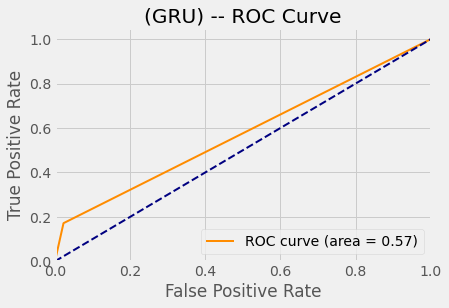

---------------
0.6991897496362021
0.817653374713941
0.5744159658988609
0.7991432897034556
---------------


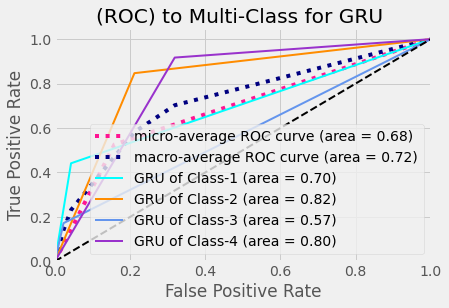

---------------
CNN-DBEMA for One-vs-One ROC AUC scores:
0.722601 (macro),
0.702113 (weighted by prevalence)
CNN-DBEMA for One-vs-Rest ROC AUC scores:
0.722601 (macro),
0.702113 (weighted by prevalence)


In [23]:

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm_tam = multilabel_confusion_matrix(y_test , predicted_class1)

n_classes = 4

'''
total=0
sensitivity_tam = 0
specificity_tam = 0
'''

total=0
sensitivity_tam = 0
specificity_tam = 0
precision_tam = 0
accuracy_tam = 0
total1= 0


for i in range(0,n_classes):
    cm1 = cm_tam[i] 
    total = sum(cm1)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    specificity = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    
    ###################################
    #specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    accuracy = cm1[0,0]/(cm1[0,0]+ cm1[1,1] )
    
    ###################################
    
    sensitivity_tam = sensitivity_tam + sensitivity
    specificity_tam = specificity_tam + specificity
    
    ###################################
    precision_tam = precision_tam + precision
    accuracy_tam = accuracy_tam + accuracy
    total1 =  total1 + total

    
    
sensitivity_tam =  sensitivity_tam / n_classes
 
specificity_tam =  specificity_tam / n_classes

precision_tam = precision_tam / n_classes

accuracy_tam = accuracy_tam / total1

#f1_score_sonuc = f1_score(y_test,predicted_class1, average='macro')



print('sensitivity_tam : ', sensitivity_tam )
print('specificity_tam : ', specificity_tam )
print('precision_tam : ', precision_tam )
print('accuracy_tam : ', accuracy_tam )
#print('f1_score_sonuc : ', f1_score_sonuc )



######################  Burası kapatıldı

'''
for i in range(0,n_classes):
    cm1 = cm_tam[i]    
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sensitivity_tam = sensitivity_tam + sensitivity
    specificity_tam = specificity_tam + specificity
    
    
sensitivity_tam =  sensitivity_tam / n_classes
 
specificity_tam =  specificity_tam / n_classes

print('sensitivity_tam : ', sensitivity_tam )
print('specificity_tam : ', specificity_tam )
'''


######################  Burası kapatıldı sonnnnn



'''
cm1 = confusion_matrix(y_test,predicted_values1_cart)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print('total1 : ', total1)
print('TP : ', cm1[0,0])
print('FP : ', cm1[0,1])
print('FN : ', cm1[1,0])
print('TN : ', cm1[1,1])
'''

#*******************************************************

print("---------------")

y_pred_varibale = predicted_class1
y_pred_varibale = np.array(y_pred_varibale)
#y_test_variable = y_pred.to_numpy()
y_test_variable = np.array(y_test)
print(y_test_variable.size)
print(y_pred_varibale.size)
y_binarize_test = label_binarize(y_test_variable, classes=[1, 2, 3, 4]) 
y_binarize_pred = label_binarize(y_pred_varibale, classes=[1, 2, 3, 4]) 


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarize_test[:, i], y_binarize_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarize_test.ravel(), y_binarize_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(GRU) -- ROC Curve')
plt.legend(loc="lower right")
plt.show()

#*************************************************


print("---------------")

Class_1 = roc_auc_score(y_binarize_test[:,0], y_binarize_pred[:,0])
Class_2 = roc_auc_score(y_binarize_test[:,1], y_binarize_pred[:,1])
Class_3 = roc_auc_score(y_binarize_test[:,2], y_binarize_pred[:,2])
Class_4 = roc_auc_score(y_binarize_test[:,3], y_binarize_pred[:,3])
print(Class_1)
print(Class_2)
print(Class_3)
print(Class_4)

print("---------------")

#****************************************************


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

classes = cycle(['Class-1', 'Class-2', 'Class-3', 'Class-4'])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkorchid'])
for i, color ,clas in zip(range(n_classes), colors, classes):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='GRU of {0} (area = {1:0.2f})'
             ''.format(clas , roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) to Multi-Class for GRU ')
plt.legend(loc="lower right")
plt.show()

#*************************************************


print("---------------")


macro_roc_auc_ovo = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovr",
                                     average="weighted")
print("CNN-DBEMA for One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("CNN-DBEMA for One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))